**CONNECTING GOOGLE CLOUD TO LOCAL DIRECTORY TO IMPORT FILES**

In [ ]:
from google.colab import drive
from google.colab import files


drive.mount('/content/drive')
upload = files.upload()

Mounted at /content/drive


Saving starbucks.csv to starbucks.csv


**READING THE DATASET INTO A DATAFRAME**

In [ ]:
import pandas as pd

df = pd.read_csv('starbucks.csv')

In [ ]:
df.columns


Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

## ***SANITY CHECKS***

**CHECKING IF THERE ARE ANY NULL VALUES IN THE DATAFRAME**

In [ ]:
## Verifying whether the NULL values got removed or not
print(df.isna().sum())

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64


In [ ]:
## Removing the null value
df = df.dropna()

In [ ]:
## Verifying whether the NULL values got removed or not
print(df.isna().sum())

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64


In [ ]:
## Checking for duplicates
print(df.duplicated().sum())

0


In [ ]:
## Checking the Data Types
print(df.dtypes)

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object


**THERE ARE VARIABLES WITH "%" SYMBOL IN THEIR VALUES WHICH NEEDS TO BE REMOVED.**

In [ ]:
## Removing '%' symbol in columns

columns_with_percentage = df.iloc[:,13:17]

print(columns_with_percentage)

for column in columns_with_percentage:
  df[column] = pd.to_numeric(df[column].str.replace('%'," "),errors='coerce')

print(df)

    Vitamin A (% DV)  Vitamin C (% DV)  Calcium (% DV)  Iron (% DV) 
0                  0%               0%               0%           0%
1                  0%               0%               0%           0%
2                  0%               0%               0%           0%
3                  0%               0%               2%           0%
4                 10%               0%              20%           0%
..                ...              ...              ...          ...
237                6%               8%              20%          10%
238                6%               0%              10%           0%
239                6%               0%              10%           0%
240                4%               0%              10%           6%
241                8%               0%              15%           0%

[241 rows x 4 columns]
              Beverage_category                                      Beverage  \
0                        Coffee                                 Bre

In [ ]:
print(df.dtypes)

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)               int64
Vitamin C (% DV)               int64
 Calcium (% DV)                int64
Iron (% DV)                  float64
Caffeine (mg)                 object
dtype: object


**THE DATATYPES FOR THE VARIABLES *TOTAL FAT* and *CAFFEINE* ARE INCORRECT. INSTEAD OF NUMERIC IT IS GIVEN AS OBJECT i.e. STRING. THIS WILL BE CORRECTED NOW.**

In [ ]:
## Converting the variables into correct data types
# df['Total Fat (g) '] = pd.to_numeric(df['Total Fat (g) '].astype(float),errors='coerce')


# Assuming df is your DataFrame
df[' Total Fat (g)'] = pd.to_numeric(df[' Total Fat (g)'], errors='coerce').astype(float)

df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce').astype(float)


In [ ]:
## Removing string values in the 'Caffeine'

# Convert "Caffeine" column to numeric, coerce non-numeric values to NaN
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce')

# Remove rows with NaN values in the "Caffeine" column
df = df.dropna(subset=['Caffeine (mg)'])



In [ ]:
## Correcting value of "3 2" in "Total Fat (g) column with domain knowledge"

# Convert the "Total Fat (g)" column to string and replace spaces with dots
df[' Total Fat (g)'] = df[' Total Fat (g)'].astype(str).str.replace(' ', '.')

# Convert the "Total Fat (g)" column back to numeric
df[' Total Fat (g)'] = pd.to_numeric(df[' Total Fat (g)'], errors='coerce')


In [ ]:
print(df.dtypes)

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)               float64
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)               int64
Vitamin C (% DV)               int64
 Calcium (% DV)                int64
Iron (% DV)                  float64
Caffeine (mg)                float64
dtype: object


In [ ]:
## TAKING ONLY REQUIRED COLUMNS FROM THE DATAFRAME
df_outliers = df.iloc[:,3:17]

print(df_outliers.dtypes)

Calories                       int64
 Total Fat (g)               float64
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)               int64
Vitamin C (% DV)               int64
 Calcium (% DV)                int64
Iron (% DV)                  float64
dtype: object


In [ ]:
 # List of numeric columns in the DataFrame
numeric_columns = df_outliers.select_dtypes(include="number").columns

# Dictionary to store outliers for each column
outliers_dict = {}

# Looping through each numeric column
for column in numeric_columns:
    # Calculating the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculating the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Defining the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Finding outliers using boolean indexing
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Storing outliers in the dictionary
    outliers_dict[column] = outliers

# Printing or analyzing the outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in Calories:
            Beverage_category                                       Beverage  \
84  Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   

   Beverage_prep  Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
84       2% Milk       510            15.0             9.0                0.2   

     Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
84            35                        330                77   

     Dietary Fibre (g)   Sugars (g)   Protein (g)   Vitamin A (% DV)   \
84                   0           74           19.0                 20   

    Vitamin C (% DV)   Calcium (% DV)   Iron (% DV)   Caffeine (mg)  
84                 4                60           2.0          150.0  
Outliers in  Total Fat (g):
            Beverage_category                                       Beverage  \
84  Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
85  Signature Espresso Drinks  White Chocolate M

In [ ]:
print(df['Iron (% DV) '].max())

50.0


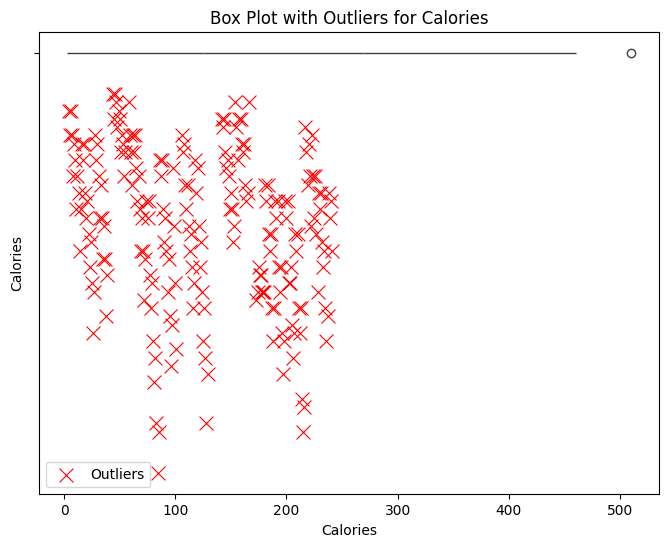

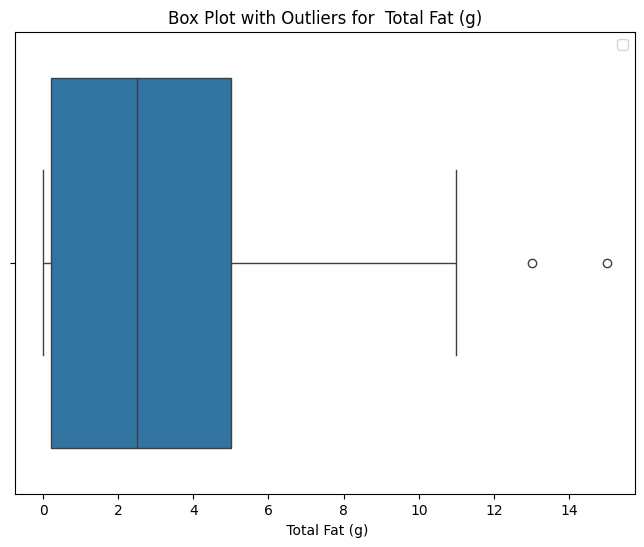

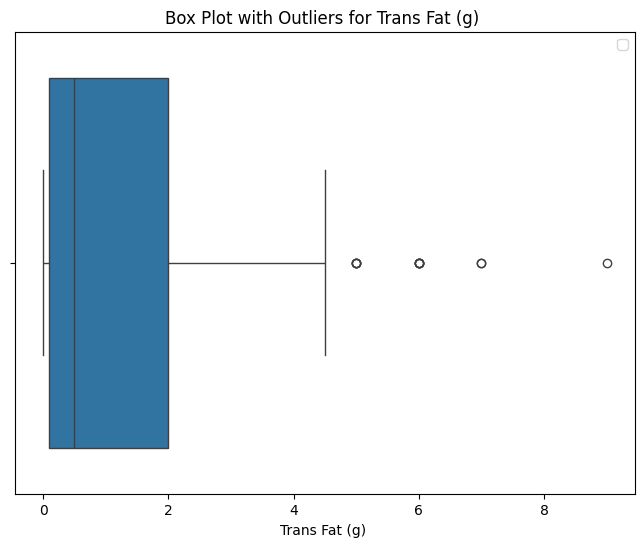

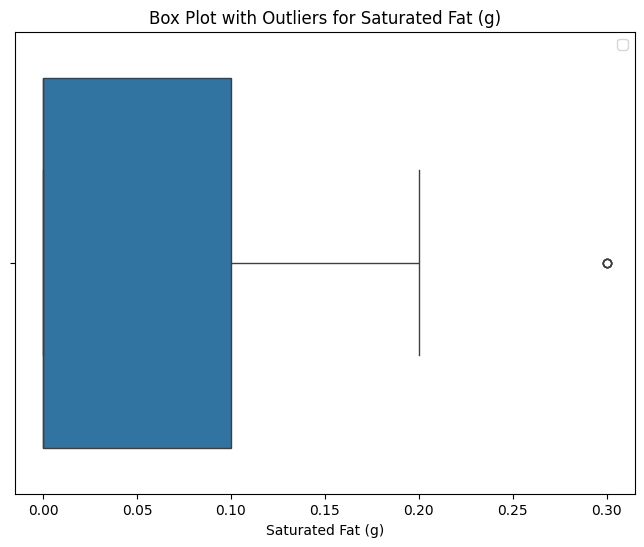

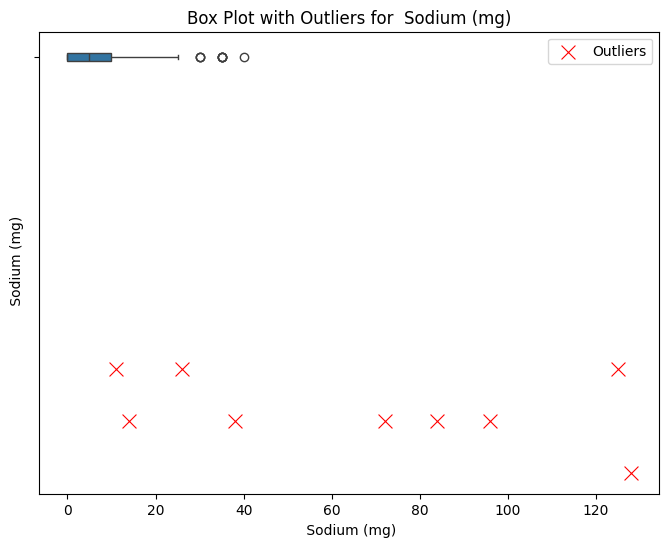

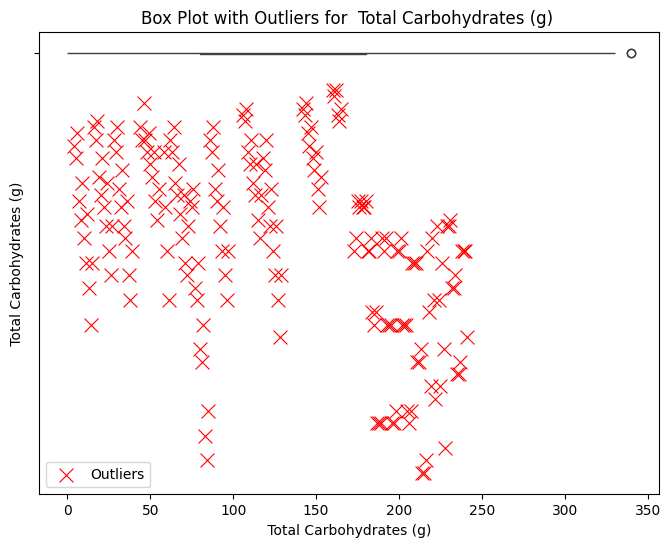

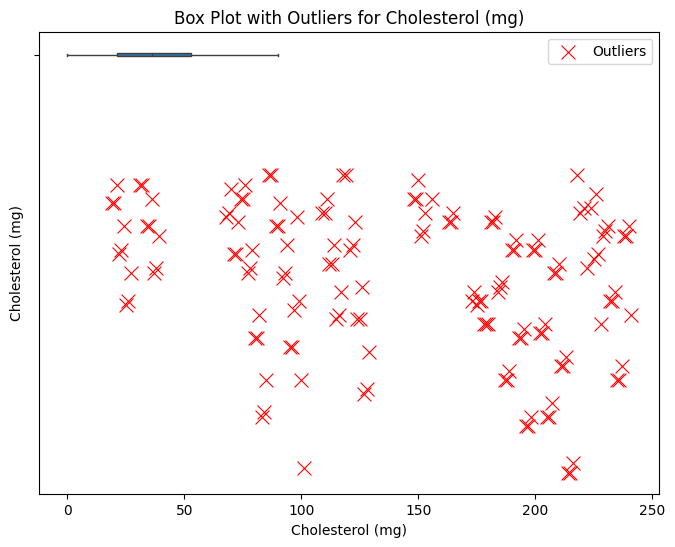

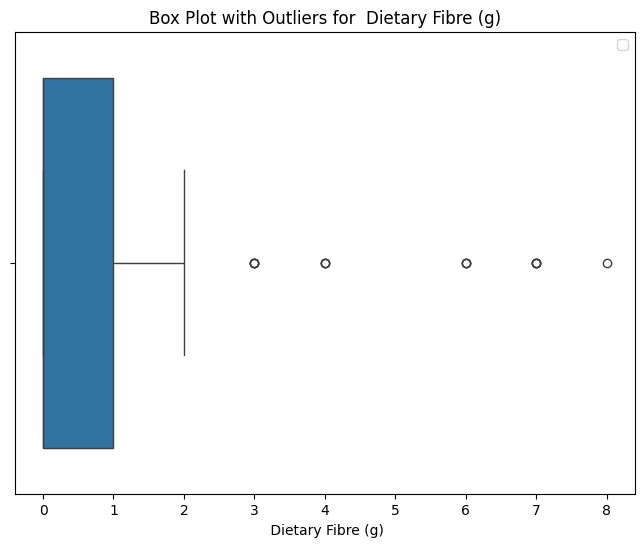

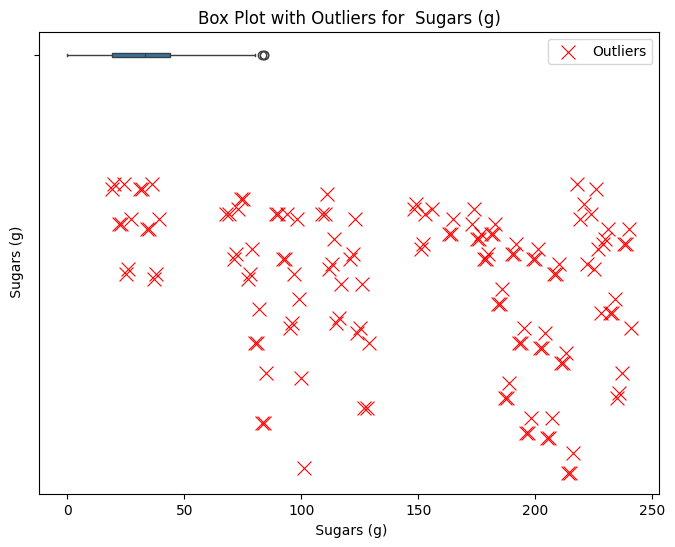

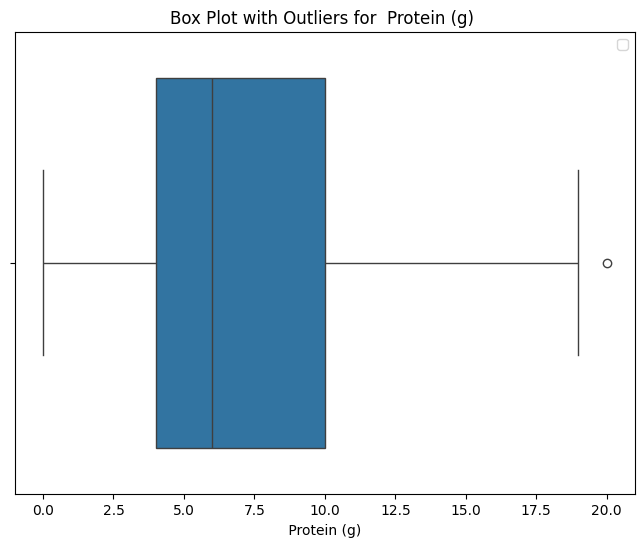

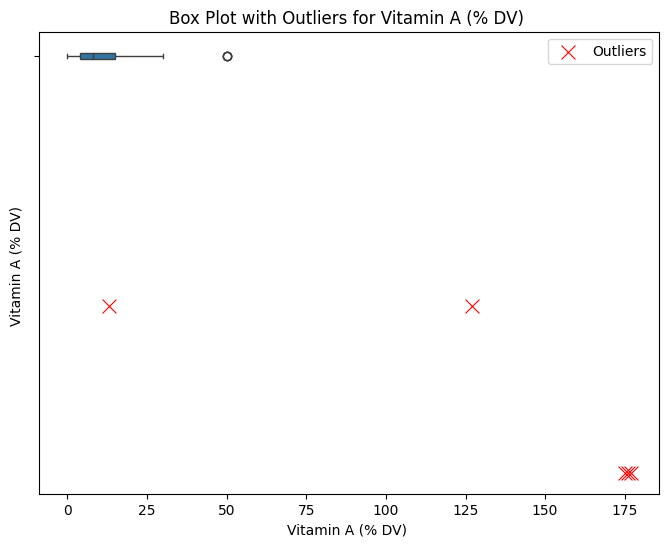

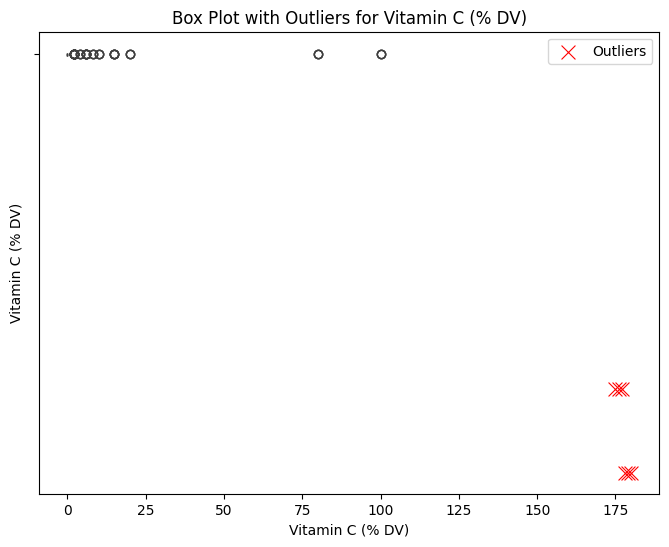

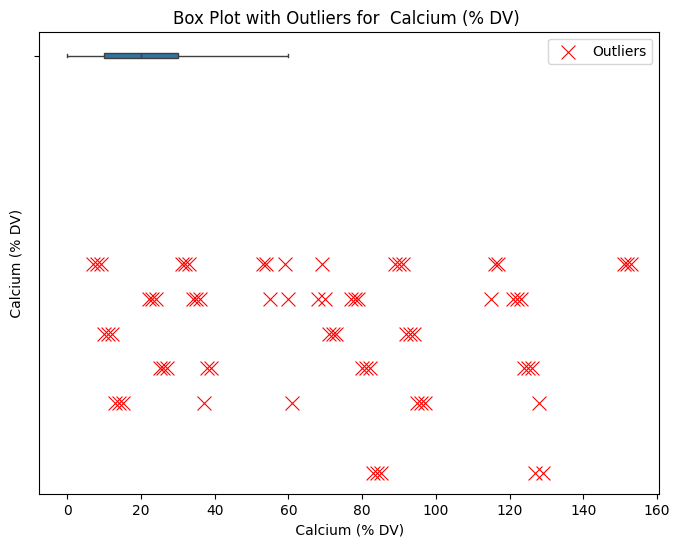

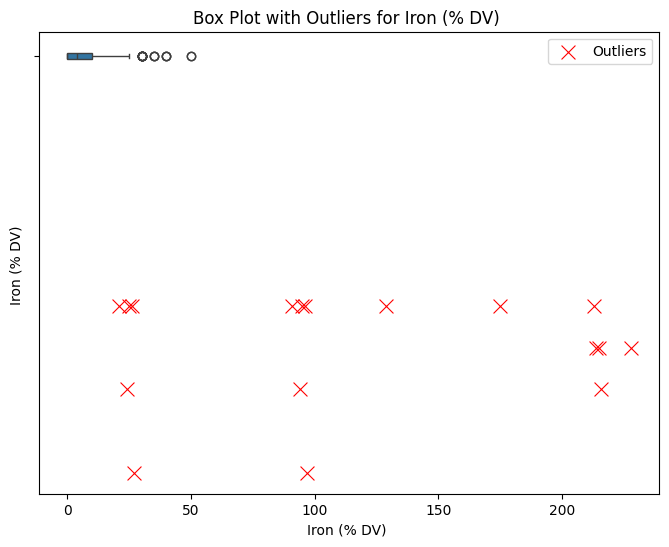

In [ ]:
## Dsiplaying the outliers using ScatterPlot
import seaborn as sns
import matplotlib.pyplot as plt


for column in df_outliers.columns:

  # Specifying the column for the box plot
  column_to_plot = column

  # Creating a box plot
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=column_to_plot, data=df_outliers)

  # Highlighting outliers
  outliers = df_outliers[(df_outliers[column_to_plot] < lower_bound) | (df_outliers[column_to_plot] > upper_bound)]
  sns.scatterplot(x=outliers.index, y=outliers[column_to_plot], color='red', marker='x', s=100, label='Outliers')

  # Adding labels and title
  plt.xlabel(column_to_plot)
  plt.title(f'Box Plot with Outliers for {column_to_plot}')
  plt.legend()

  # Showing the plot
  plt.show()


In [ ]:
df.describe()

Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
count  219.000000      218.000000      219.000000         219.000000   
mean   201.584475        3.074312        1.394977           0.039269   
std    102.353614        3.007484        1.685154           0.073018   
min      3.000000        0.000000        0.000000           0.000000   
25%    125.000000        0.200000        0.100000           0.000000   
50%    190.000000        2.500000        0.500000           0.000000   
75%    270.000000        5.000000        2.000000           0.100000   
max    510.000000       15.000000        9.000000           0.300000   

        Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
count    219.000000                 219.000000        219.000000   
mean       6.643836                 137.374429         37.296804   
std        8.832857                  80.605714         20.926664   
min        0.000000                   0.000000          0.000000   
25%        0.000000                  80.000000         21.000000   
50%        5.000000                 130.000000         36.000000   
75%       10.000000                 180.000000         53.000000   
max       40.000000                 340.000000         90.000000   

        Dietary Fibre (g)   Sugars (g)   Protein (g)   Vitamin A (% DV)   \
count          219.000000   219.000000     219.000000         219.000000   
mean             0.844749    34.077626       7.294521          10.292237   
std              1.441077    19.971043       4.790546           8.200833   
min              0.000000     0.000000       0.000000           0.000000   
25%              0.000000    19.000000       4.000000           4.000000   
50%              0.000000    33.000000       6.000000           8.000000   
75%              1.000000    44.000000      10.000000          15.000000   
max              8.000000    84.000000      20.000000          50.000000   

       Vitamin C (% DV)   Calcium (% DV)   Iron (% DV)   Caffeine (mg)  
count        219.000000        219.000000    219.000000     219.000000  
mean           3.757991         21.675799      8.050228      89.520548  
std           15.038814         14.525205     10.773406      64.726831  
min            0.000000          0.000000      0.000000       0.000000  
25%            0.000000         10.000000      0.000000      50.000000  
50%            0.000000         20.000000      4.000000      75.000000  
75%            0.000000         30.000000     10.000000     142.500000  
max          100.000000         60.000000     50.000000     410.000000

In [ ]:
## Renaming the incorrect values
replacement_dict = {
    'Caff√® Latte': 'Caffe Latte',
    'AnotherOldName': 'NewName',
    'OldName3': 'NewName3',
    'OldName4': 'NewName4',
}

df['Beverage'] = df['Beverage'].replace(replacement_dict)


In [ ]:
print(df['Beverage'].head(100))

0                                     Brewed Coffee
1                                     Brewed Coffee
2                                     Brewed Coffee
3                                     Brewed Coffee
4                                       Caffè Latte
5                                       Caffè Latte
6                                       Caffè Latte
7                                       Caffè Latte
8                                       Caffè Latte
9                                       Caffè Latte
10                                      Caffè Latte
11                                      Caffè Latte
12                                      Caffè Latte
13                                      Caffè Latte
14                                      Caffè Latte
15                                      Caffè Latte
16              Caffè Mocha (Without Whipped Cream)
17              Caffè Mocha (Without Whipped Cream)
18              Caffè Mocha (Without Whipped Cream)
19          

**STANDARDIZING THE VARIABLES TO PERFORM THE ANALYSIS AND TO AVOID ANY SORT OF BIAS OR EFFECT IN THE OVERALL MODEL OUTCOME**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Identifying the  numeric columns in the dataframe
numeric_columns = df.select_dtypes(include='number').columns

# Min-Max Scaling for numeric columns
minmax_scaler = MinMaxScaler()
df[numeric_columns] = minmax_scaler.fit_transform(df[numeric_columns])

# Standard Scaling for numeric columns
standard_scaler = StandardScaler()
df[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])

print("DataFrame after scaling:")
print(df.head(25))

DataFrame after scaling:
          Beverage_category                             Beverage  \
0                    Coffee                        Brewed Coffee   
1                    Coffee                        Brewed Coffee   
2                    Coffee                        Brewed Coffee   
3                    Coffee                        Brewed Coffee   
4   Classic Espresso Drinks                          Caffè Latte   
5   Classic Espresso Drinks                          Caffè Latte   
6   Classic Espresso Drinks                          Caffè Latte   
7   Classic Espresso Drinks                          Caffè Latte   
8   Classic Espresso Drinks                          Caffè Latte   
9   Classic Espresso Drinks                          Caffè Latte   
10  Classic Espresso Drinks                          Caffè Latte   
11  Classic Espresso Drinks                          Caffè Latte   
12  Classic Espresso Drinks                          Caffè Latte   
13  Classic Espresso Dr

In [ ]:
## Downloading the cleaned dataframe to my local system
from google.colab import files

# Assuming 'df' is the DataFrame you want to download
df.to_csv('StarbucksCleaned.csv', index=False)

# Download the file
files.download('StarbucksCleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
## Just one other type of sclaing

# from sklearn.preprocessing import RobustScaler

# df_numeric = df.copy()
# # Robust Scaling for numeric columns
# robust_scaler = RobustScaler()
# df_numeric[df_numeric.select_dtypes(include='number').columns] = robust_scaler.fit_transform(df_numeric.select_dtypes(include='number'))

# print("DataFrame after Robust Scaling:")
# print(df_numeric)


# print(df_numeric['Caffeine (mg)'].head(300))




**PERFORMING ONE-HOT ENCODING TO THE CATEGORICAL VARIABLES TO USE THEM FOR BUILDING THE MODEL**

In [ ]:
## Performing One-hot encoding to work with Unsupervised Learning

from sklearn.preprocessing import OneHotEncoder
df_copy = df.copy()

## Encoding the 'Beverage' column
df_beverage_encoded = pd.get_dummies(df_copy['Beverage'], prefix='Beverage')

# Encoding the 'Beverage_category' column
df_category_encoded = pd.get_dummies(df_copy['Beverage_category'], prefix='Beverage_Cat')

# Encoding the 'Beverage_prep' column
df_prep_encoded = pd.get_dummies(df_copy['Beverage_prep'], prefix='Beverage_Prep')

# Concatenating the one-hot encoded DataFrames along the columns
df_encoded = pd.concat([df_copy, df_beverage_encoded, df_category_encoded, df_prep_encoded], axis=1)

# Displaying the resulting DataFrame
print(df_encoded)

              Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Ca

In [ ]:
print(df_encoded.isna().sum())

Beverage_category                                           0
Beverage                                                    0
Beverage_prep                                               0
Calories                                                    0
 Total Fat (g)                                              1
Trans Fat (g)                                               0
Saturated Fat (g)                                           0
 Sodium (mg)                                                0
 Total Carbohydrates (g)                                    0
Cholesterol (mg)                                            0
 Dietary Fibre (g)                                          0
 Sugars (g)                                                 0
 Protein (g)                                                0
Vitamin A (% DV)                                            0
Vitamin C (% DV)                                            0
 Calcium (% DV)                                             0
Iron (% 

In [ ]:
df_encoded.dropna()

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
236  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Calories   Total Fat (g)  Trans Fat (g)   \
0                 Short -1.944625       -0.991246       -0.829700   
1                  Tall -1.934833       -0.991246       -0.829700   
2                Grande -1.925040       -0.991246       -0.829700   
3                 Venti -1.925040       -0.991246       -0.829700   
4     Short Nonfat Milk -1.288532       -0.991246       -0.770223   
..                  ...       ...             ...             ...   
236          Whole Milk  1.453349        0.975041        0.954631   
238    Tall Nonfat Milk -0.309289       -0.991246       -0.770223   
239          Whole Milk -0.015516        0.141869        0.359854   
240             Soymilk -0.211365       -0.524670       -0.710745   
241  Grande Nonfat Milk  0.376181       -0.991246       -0.770223   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0            -0.539039     -0.753896                  -1.646009   
1            -0.539039     -0.753896                  -1.583836   
2            -0.539039     -0.753896                  -1.583836   
3            -0.539039     -0.753896                  -1.583836   
4            -0.539039     -0.186531                  -0.775594   
..                 ...           ...                        ...   
236           2.206300      0.948199                   1.524786   
238          -0.539039     -0.753896                   0.281337   
239           0.833631      0.380834                   0.281337   
240          -0.539039     -0.753896                   0.281337   
241          -0.539039     -0.186531                   1.151752   

     Cholesterol (mg)  ...  Beverage_Prep_Grande Nonfat Milk  \
0           -1.786345  ...                                 0   
1           -1.786345  ...                                 0   
2           -1.786345  ...                                 0   
3           -1.786345  ...                                 0   
4           -1.307391  ...                                 0   
..                ...  ...                               ...   
236          1.566333  ...                                 0   
238          0.081575  ...                                 0   
239          0.081575  ...                                 0   
240         -0.014216  ...                                 0   
241          0.895797  ...                                 1   

     Beverage_Prep_Short  Beverage_Prep_Short Nonfat Milk  Beverage_Prep_Solo  \
0                      1                                0                   0   
1                      0                                0                   0   
2                      0                                0                   0   
3                      0                                0                   0   
4                      0                                1                   0   
..                   ...                              ...                 ...   
236                    0                                0              

In [ ]:
df_encoded = df_encoded.dropna(axis=0)
print(df_encoded[' Total Fat (g)'])

0     -0.991246
1     -0.991246
2     -0.991246
3     -0.991246
4     -0.991246
         ...   
236    0.975041
238   -0.991246
239    0.141869
240   -0.524670
241   -0.991246
Name:  Total Fat (g), Length: 218, dtype: float64


### **BUILDING THE CLUSTERING MODELS**

**IMPLEMENTING DBSCAN ON THE WHOLE DATAFRAME**



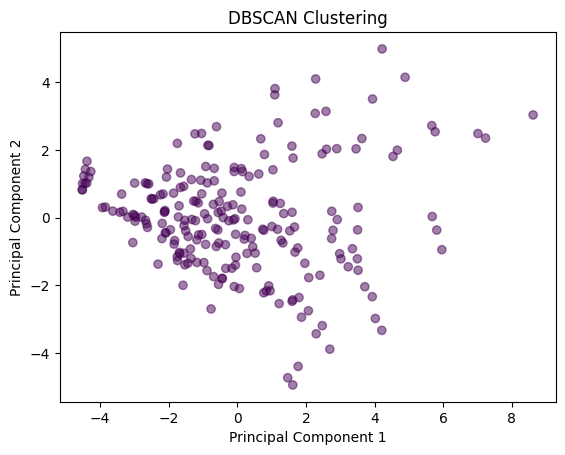

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Define the parameters for DBSCAN
eps = 0.25  # clustering radius (distance between points in the same cluster)
min_samples = 10  # minimum number of samples required to form a cluster

# Create a DBSCAN instance and fit the data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_numeric)

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Visualize the clusters using a scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
print(df_numeric.columns)

Index(['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       ' Sodium (mg)', ' Total Carbohydrates (g) ', 'Cholesterol (mg)',
       ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) ',
       'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ',
       'Iron (% DV) ', 'Caffeine (mg)', 'Beverage_Banana Chocolate Smoothie',
       'Beverage_Brewed Coffee', 'Beverage_Caffè Americano',
       'Beverage_Caffè Latte', 'Beverage_Caffè Mocha (Without Whipped Cream)',
       'Beverage_Cappuccino', 'Beverage_Caramel',
       'Beverage_Caramel (Without Whipped Cream)',
       'Beverage_Caramel Apple Spice (Without Whipped Cream)',
       'Beverage_Caramel Macchiato', 'Beverage_Coffee', 'Beverage_Espresso',
       'Beverage_Hot Chocolate (Without Whipped Cream)',
       'Beverage_Iced Brewed Coffee (With Classic Syrup)',
       'Beverage_Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Beverage_Java Chip', 'Beverage_Java Chip (Without Whipped Cream)',
       

### **DBSCAN CLUSTERING IN 3D**

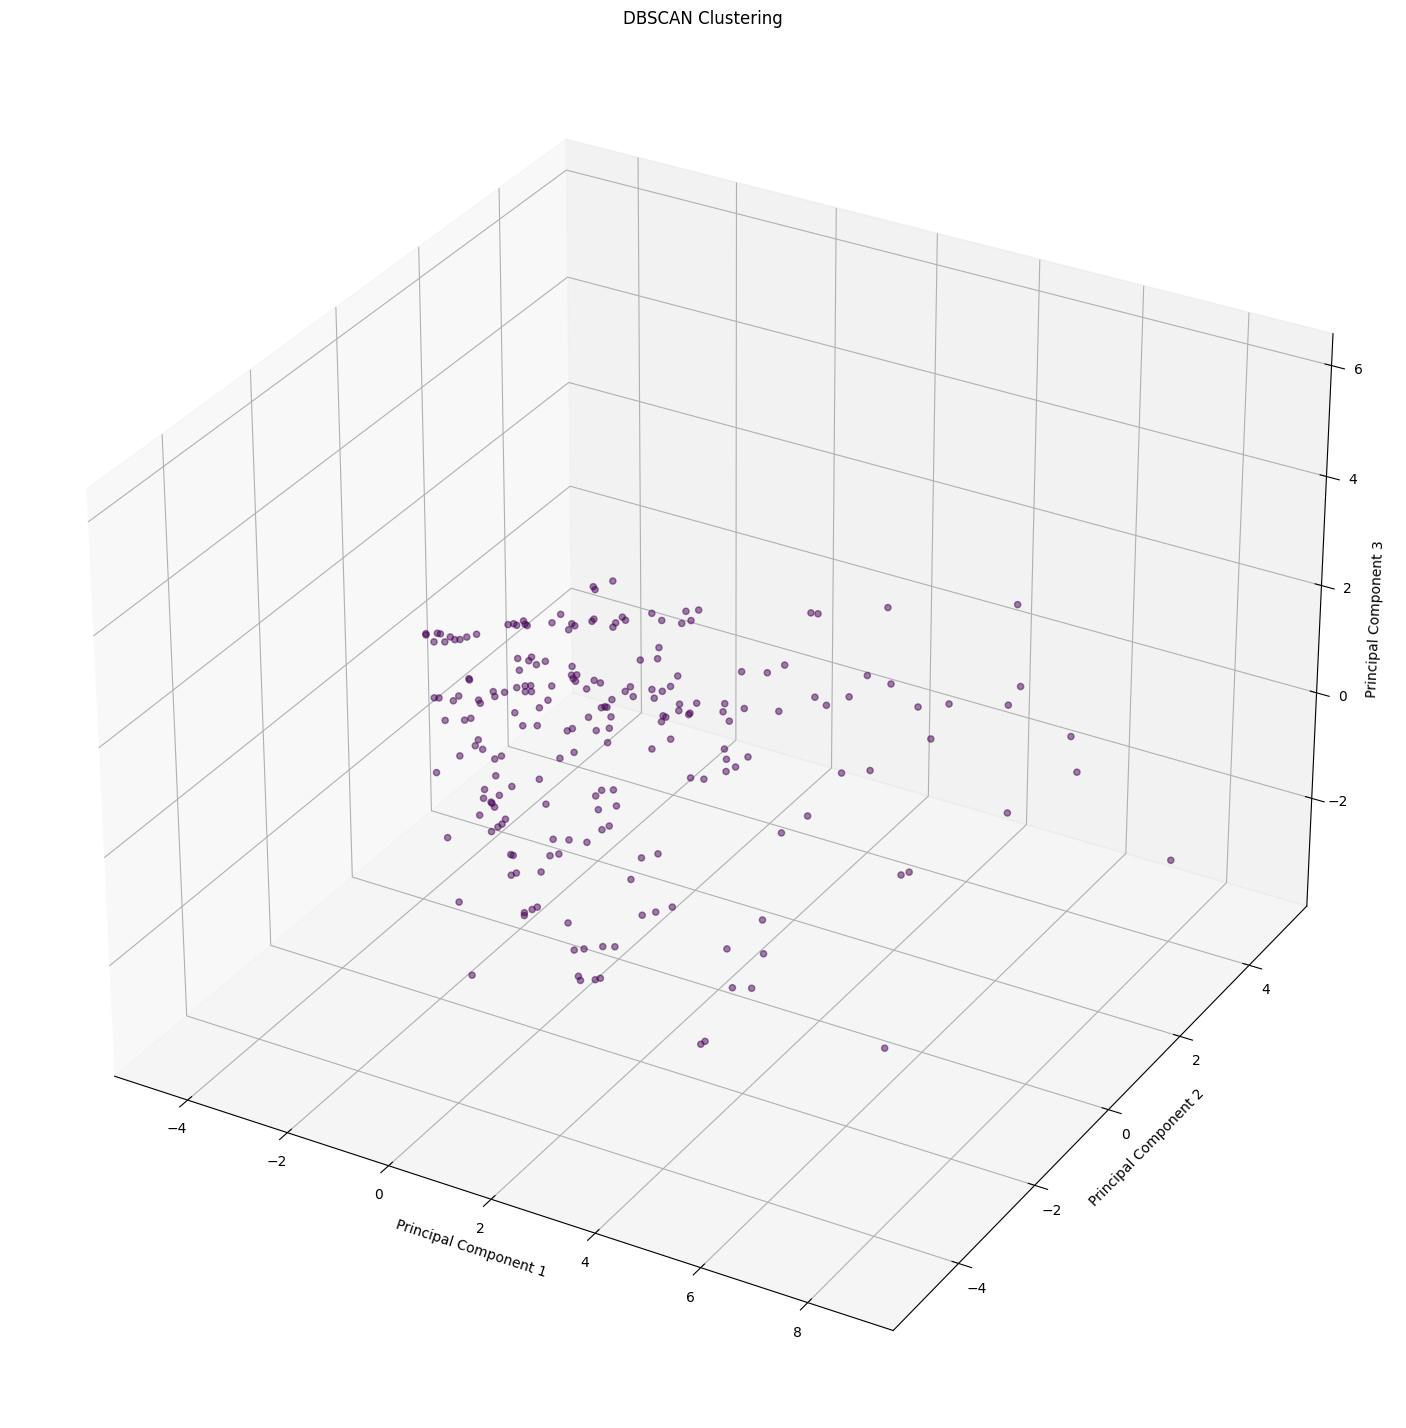

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the parameters for DBSCAN
eps = 0.25  # clustering radius (distance between points in the same cluster)
min_samples = 10  # minimum number of samples required to form a cluster

# Creating a DBSCAN instance and fit the data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df_numeric)


ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=clusters, cmap='viridis', alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clustering')
plt.show()

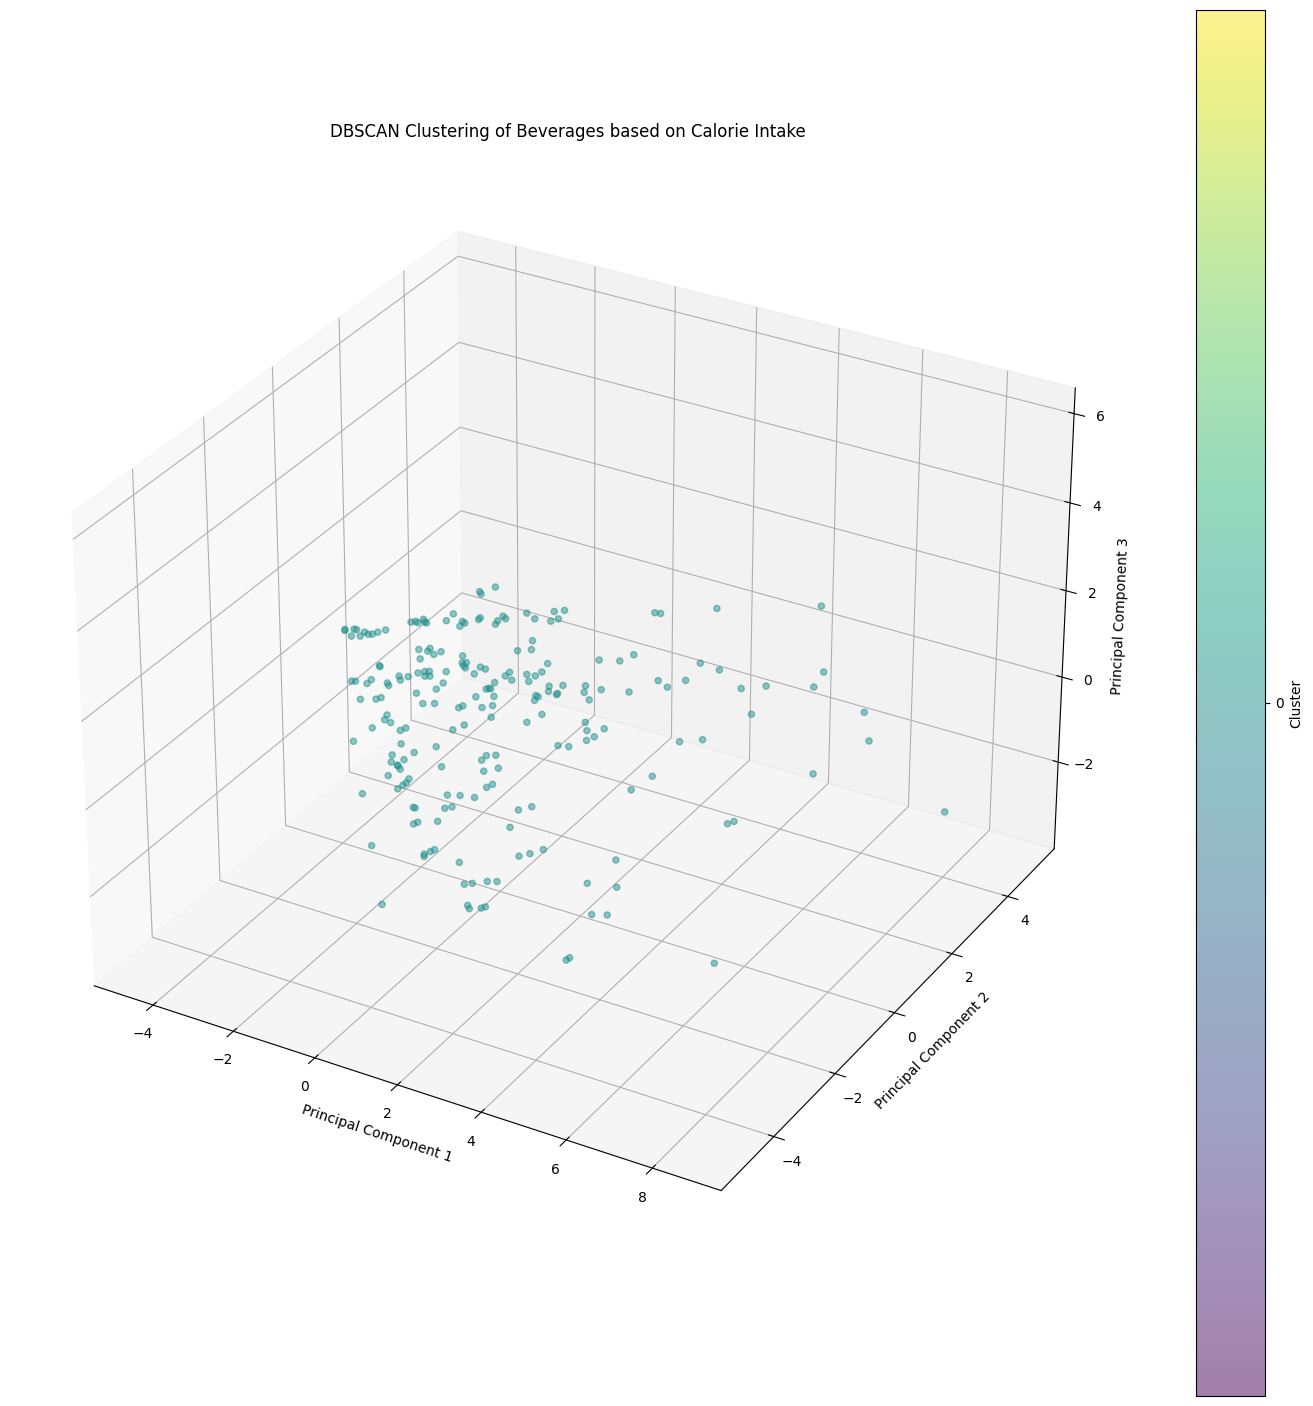

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

# Assuming 'Calories' is the column representing calorie intake
calorie_data = df_encoded['Calories'].values.reshape(-1, 1)

# Creating a DBSCAN instance and fit the data
eps = 50  # clustering radius (distance between points in the same cluster)
min_samples = 10  # minimum number of samples required to form a cluster

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(calorie_data)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1))

# Creating a 3D plot
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

# Scattering plot for clustering
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=clusters, cmap='viridis', alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clustering of Beverages based on Calorie Intake')

# Adding  a colorbar to show cluster assignments
cbar = plt.colorbar(scatter, ticks=np.unique(clusters))
cbar.set_label('Cluster')

plt.show()


**3-D DBSCAN WITH ONLY TWO PRINCIPAL COMPONENTS**

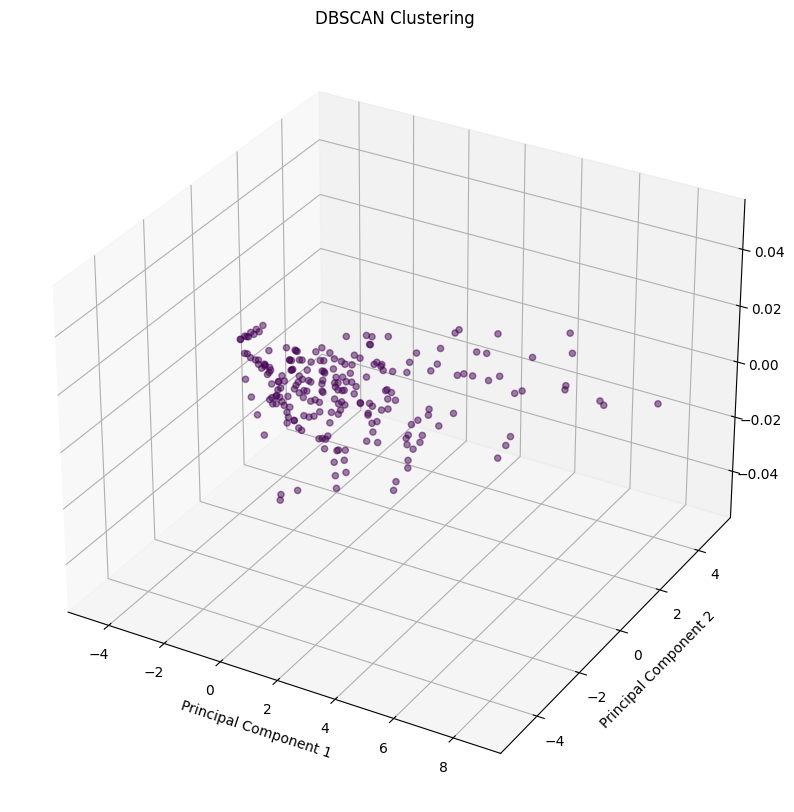

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the parameters for DBSCAN
eps = 0.25  # clustering radius (distance between points in the same cluster)
min_samples = 10  # minimum number of samples required to form a cluster

# Creating a DBSCAN instance and fit the data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)


ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clustering')
plt.show()

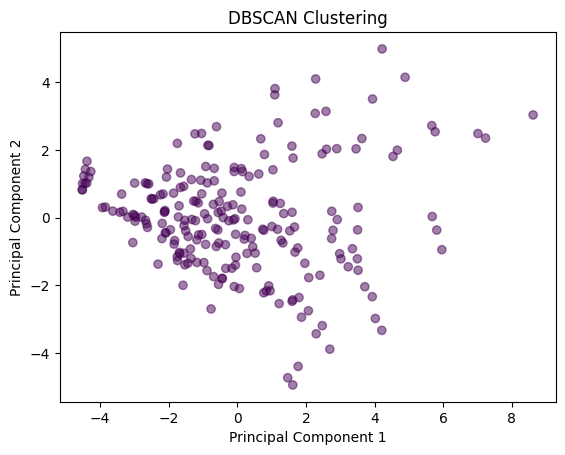

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the parameters for DBSCAN
eps = 0.25  # clustering radius (distance between points in the same cluster)
min_samples = 10  # minimum number of samples required to form a cluster

# Creating a DBSCAN instance and fit the data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Visualizing the clusters using a scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**K-MEANS CLUSTERING: 3 CLUSTERS**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


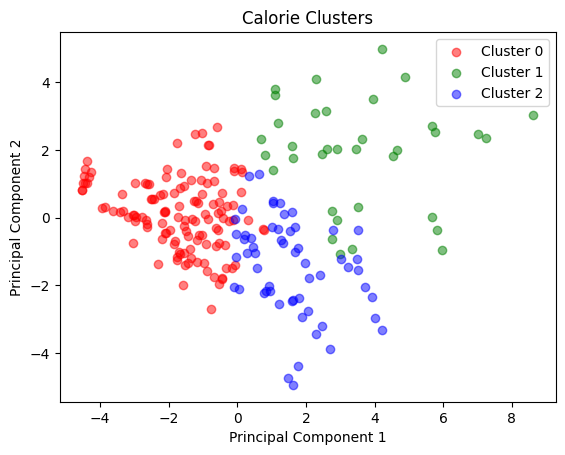

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 3

# Creating a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Creating a color map for different clusters
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Visualizing the clusters using a scatter plot with different colors for clusters
for cluster_label in np.unique(clusters):
    if cluster_label in colors:
        indices = clusters == cluster_label
        plt.scatter(reduced_data[indices, 0], reduced_data[indices, 1], c=colors[cluster_label], label=f'Cluster {cluster_label}', alpha=0.5)

plt.title('Calorie Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


**K-MEANS CLUSTERING WITH PCA FOR GROUPING THE DATA BASED ON CALORIE INTAKE**

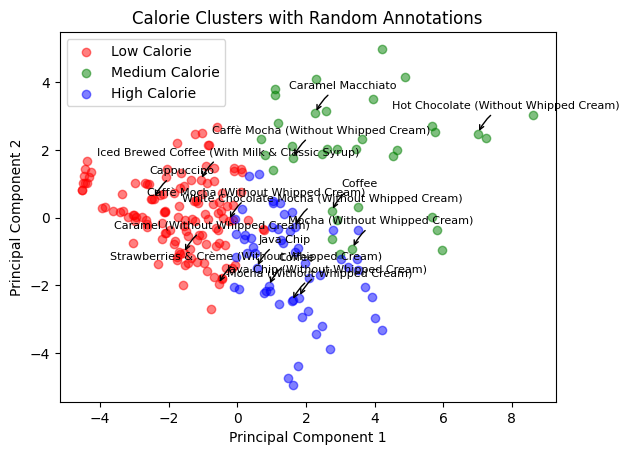

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 3

# Creating a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Creating a color map for different clusters
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Mapping cluster labels to custom legend labels
legend_labels = {0: 'Low Calorie', 1: 'Medium Calorie', 2: 'High Calorie'}

# Visualizing the clusters using a scatter plot with different colors for clusters
for cluster_label in np.unique(clusters):
    if cluster_label in colors:
        indices = np.where(clusters == cluster_label)[0]  # Ensuring boolean index has the correct length

        # Filtering indices to only include those present in the DataFrame
        valid_indices = [index for index in indices if index < len(df)]

        # Randomly selecting 5 values from each cluster for annotation
        random_sample_indices = np.random.choice(valid_indices, size=min(5, len(valid_indices)), replace=False)

        plt.scatter(reduced_data[valid_indices, 0], reduced_data[valid_indices, 1], c=colors[cluster_label], label=legend_labels[cluster_label], alpha=0.5)

        # Annotating each data point with the beverage name using arrows to avoid overlap
        for i, beverage_name in enumerate(df['Beverage'].iloc[random_sample_indices]):
            plt.annotate(beverage_name,
                         (reduced_data[random_sample_indices, 0][i], reduced_data[random_sample_indices, 1][i]),
                         xytext=(20, 20), textcoords='offset points',
                         fontsize=8, color='black', ha='center', va='center',
                         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.title('Calorie Clusters with Random Annotations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


**CLUSTERING USING BUBBLE CHART**

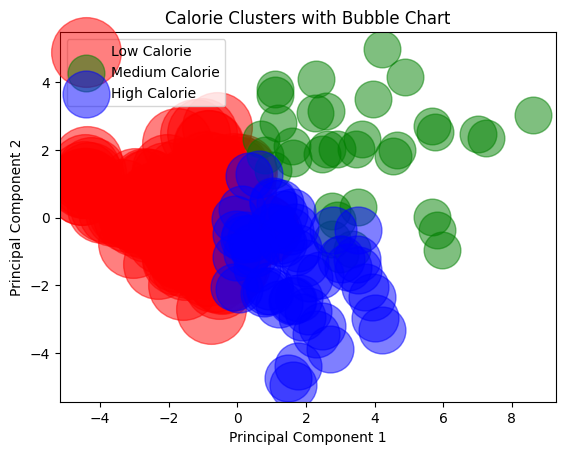

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 3

# Creating a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Creating a color map for different clusters
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Mapping cluster labels to custom legend labels
legend_labels = {0: 'Low Calorie', 1: 'Medium Calorie', 2: 'High Calorie'}

# Counting the number of data points in each cluster
cluster_counts = np.bincount(clusters)

# Visualizing the clusters using a bubble chart
for cluster_label in np.unique(clusters):
    if cluster_label in colors:
        indices = np.where(clusters == cluster_label)[0]  # Ensuring boolean index has the correct length

        # Filtering indices to only include those present in the DataFrame
        valid_indices = [index for index in indices if index < len(df)]

        plt.scatter(reduced_data[valid_indices, 0], reduced_data[valid_indices, 1],
                    s=cluster_counts[cluster_label] * 20,  # Adjust the multiplier for bubble size
                    c=colors[cluster_label], label=legend_labels[cluster_label], alpha=0.5)

plt.title('Calorie Clusters with Bubble Chart')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


**K-MEANS CLUSTERING WITH BUBBLE CHART - INCREASED AESTHETICS**

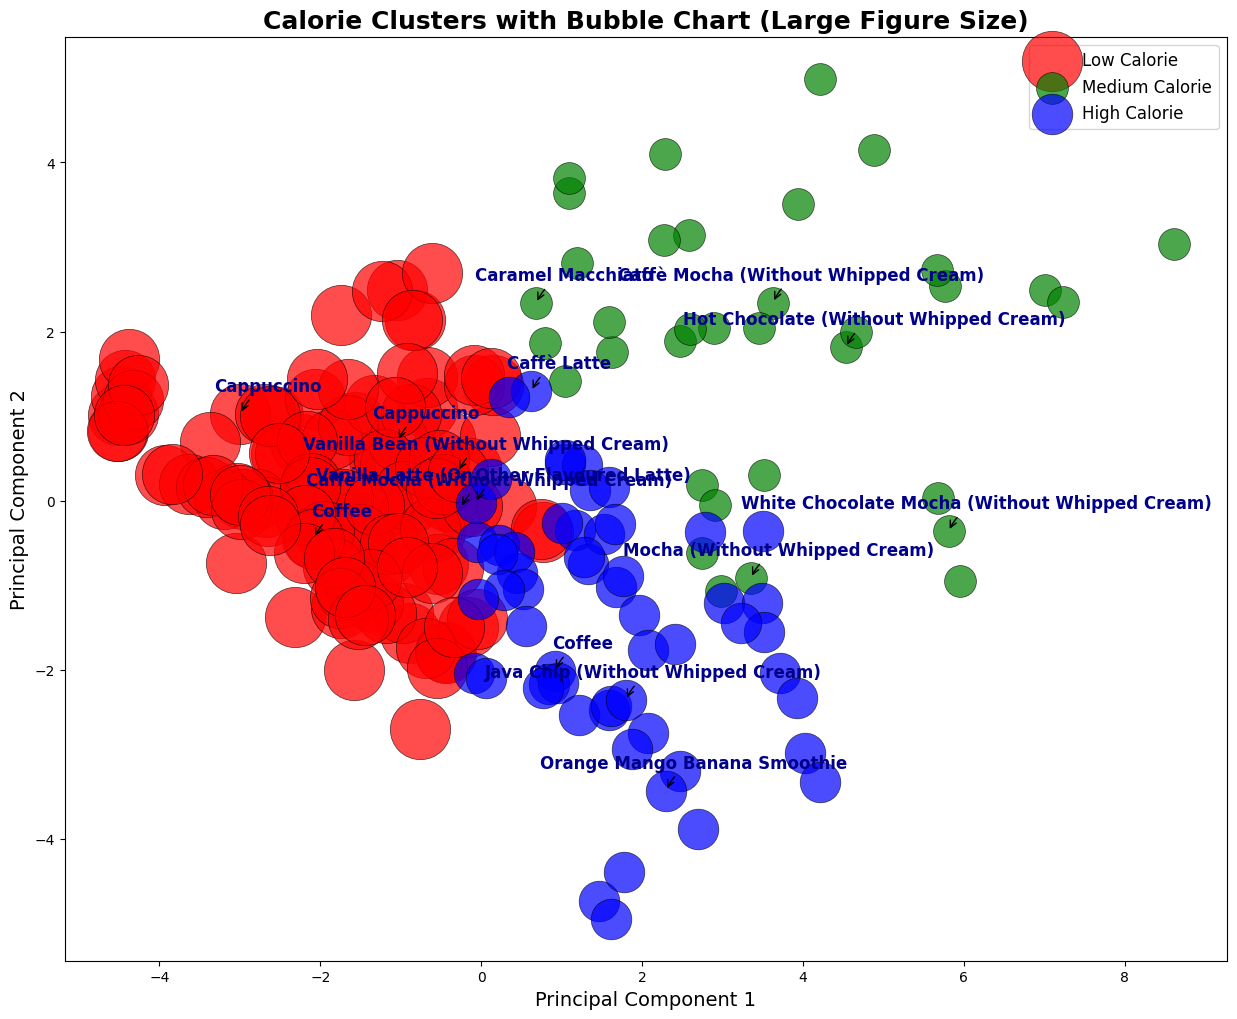

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 3

# Creating a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Creating a color map for different clusters
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Mapping cluster labels to custom legend labels
legend_labels = {0: 'Low Calorie', 1: 'Medium Calorie', 2: 'High Calorie'}

# Counting the number of data points in each cluster
cluster_counts = np.bincount(clusters)

# Setting a larger figure size
fig, ax = plt.subplots(figsize=(15, 12))

# Visualizing the clusters using a bubble chart
for cluster_label in np.unique(clusters):
    if cluster_label in colors:
        indices = np.where(clusters == cluster_label)[0]  # Ensuring boolean index has the correct length

        # Filtering indices to only include those present in the DataFrame
        valid_indices = [index for index in indices if index < len(df)]

        plt.scatter(reduced_data[valid_indices, 0], reduced_data[valid_indices, 1],
                    s=cluster_counts[cluster_label] * 15,  # Adjusting the multiplier for bubble size
                    c=colors[cluster_label], label=legend_labels[cluster_label], alpha=0.7, edgecolors='black', linewidth=0.5)

        # Annotating each data point with the beverage name using arrows to avoid overlap
        random_sample_indices = np.random.choice(valid_indices, size=min(5, len(valid_indices)), replace=False)
        for i, beverage_name in enumerate(df['Beverage'].iloc[random_sample_indices]):
            plt.annotate(beverage_name,
                         (reduced_data[random_sample_indices, 0][i], reduced_data[random_sample_indices, 1][i]),
                         xytext=(20, 20), textcoords='offset points',
                         fontsize=12, color='darkblue', ha='center', va='center', fontweight='bold',
                         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.title('Calorie Clusters with Bubble Chart (Large Figure Size)', fontsize=18, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(fontsize=12)
plt.show()


**K-MEANS CLUSTERING: 7 CLUSTERS**

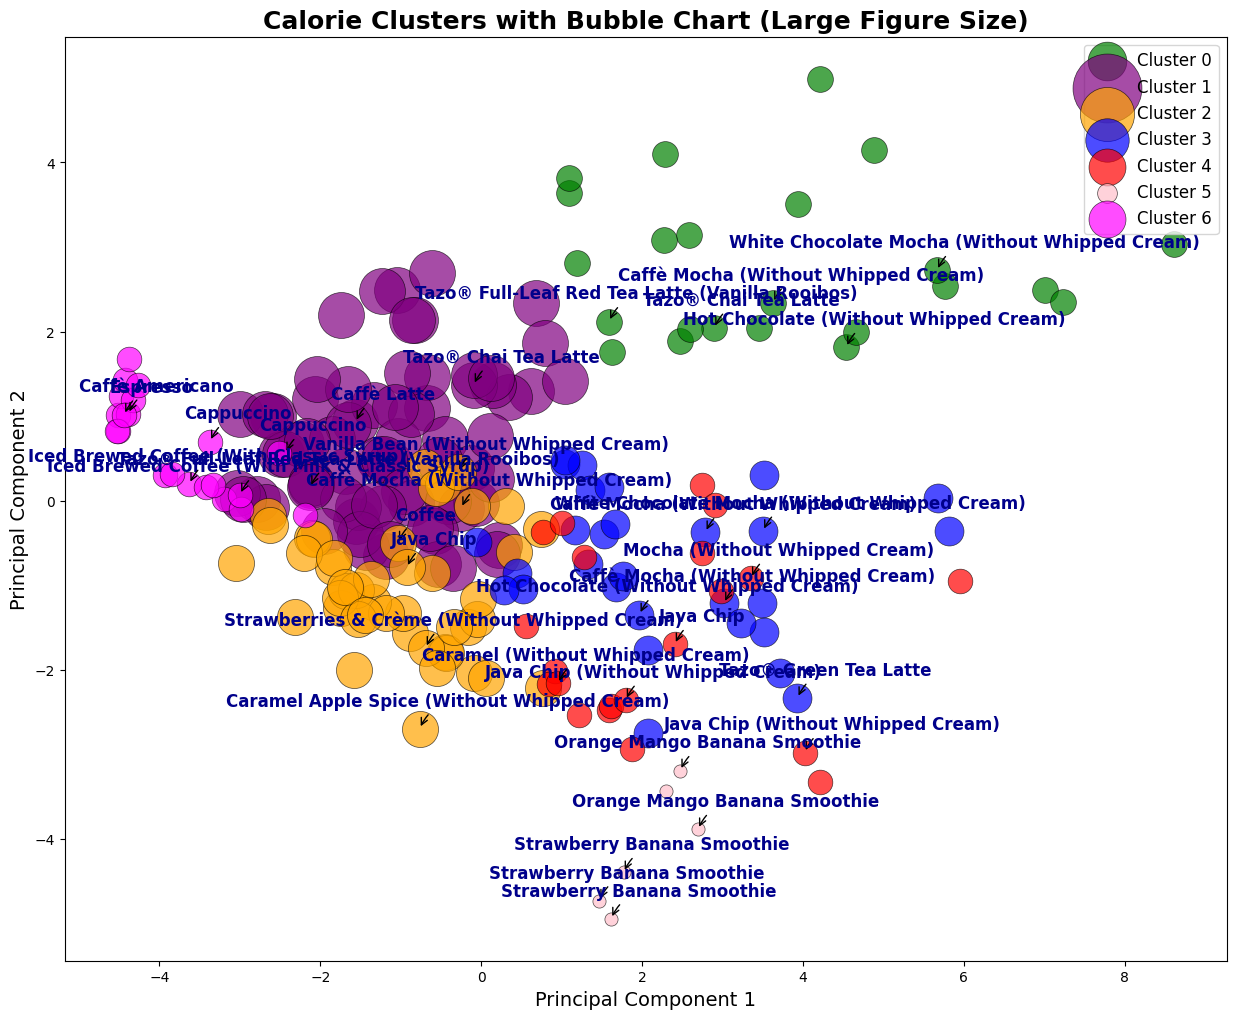

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 7

# Creating a K-Means instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Creating a color map for different clusters
colors = {0: 'green', 1: 'purple', 2: 'orange', 3: 'blue', 4: 'red', 5: 'pink', 6: 'magenta'}

# Mapping cluster labels to custom legend labels dynamically
unique_clusters = np.unique(clusters)
legend_labels = {cluster_label: f'Cluster {cluster_label}' for cluster_label in unique_clusters}

# Counting the number of data points in each cluster
cluster_counts = np.bincount(clusters)

# Setting a larger figure size
fig, ax = plt.subplots(figsize=(15, 12))

# Visualizing the clusters using a bubble chart
for cluster_label in unique_clusters:
    if cluster_label in colors:
        indices = np.where(clusters == cluster_label)[0]
        valid_indices = [index for index in indices if index < len(df)]

        plt.scatter(reduced_data[valid_indices, 0], reduced_data[valid_indices, 1],
                    s=cluster_counts[cluster_label] * 15,
                    c=colors[cluster_label], label=legend_labels[cluster_label],
                    alpha=0.7, edgecolors='black', linewidth=0.5)

        # Annotating each data point with the beverage name using arrows to avoid overlap
        random_sample_indices = np.random.choice(valid_indices, size=min(5, len(valid_indices)), replace=False)
        for i, beverage_name in enumerate(df['Beverage'].iloc[random_sample_indices]):
            plt.annotate(beverage_name,
                         (reduced_data[random_sample_indices, 0][i], reduced_data[random_sample_indices, 1][i]),
                         xytext=(20, 20), textcoords='offset points',
                         fontsize=12, color='darkblue', ha='center', va='center', fontweight='bold',
                         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.title('Calorie Clusters with Bubble Chart (Large Figure Size)', fontsize=18, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(fontsize=12, markerscale=1.5)
plt.show()


<ipython-input-79-a6fa29c3abe5>:59: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


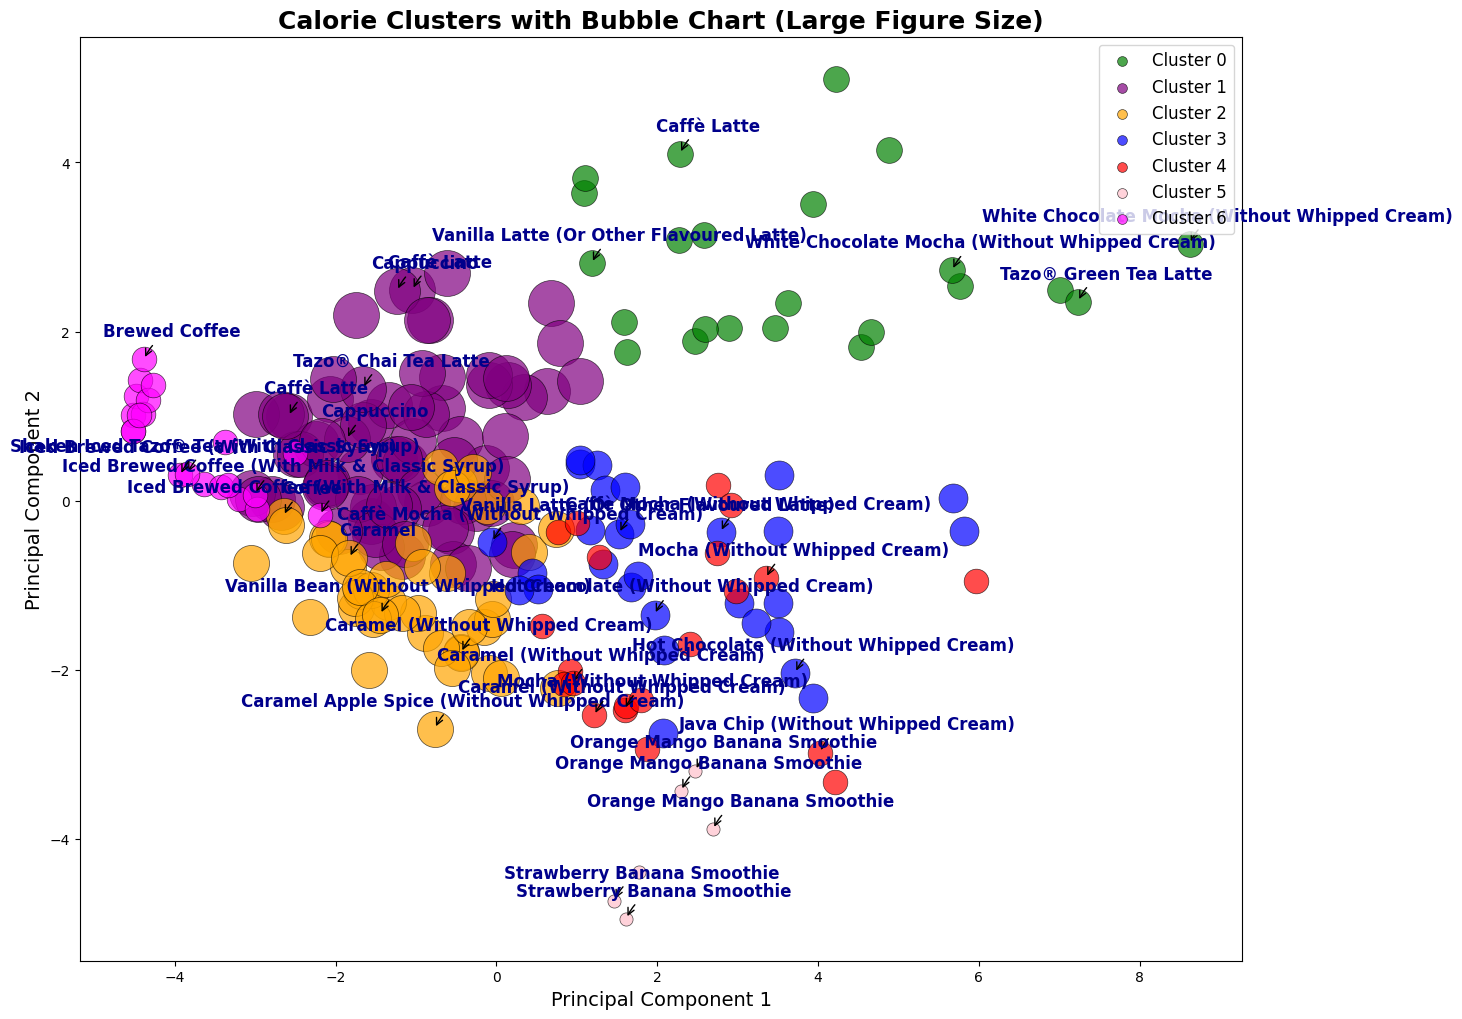

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.legend_handler import HandlerPathCollection

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 7

# Creating a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Creating a color map for different clusters
colors = {0: 'green', 1: 'purple', 2: 'orange', 3: 'blue', 4: 'red', 5: 'pink', 6: 'magenta'}

# Mapping cluster labels to custom legend labels dynamically
unique_clusters = np.unique(clusters)
legend_labels = {cluster_label: f'Cluster {cluster_label}' for cluster_label in unique_clusters}

# Counting the number of data points in each cluster
cluster_counts = np.bincount(clusters)

# Setting a larger figure size
fig, ax = plt.subplots(figsize=(15, 12))

# Visualizing the clusters using a bubble chart
for cluster_label in unique_clusters:
    if cluster_label in colors:
        indices = np.where(clusters == cluster_label)[0]
        valid_indices = [index for index in indices if index < len(df)]

        scatter = plt.scatter(reduced_data[valid_indices, 0], reduced_data[valid_indices, 1],
                              s=cluster_counts[cluster_label] * 15,
                              c=colors[cluster_label], label=legend_labels[cluster_label],
                              alpha=0.7, edgecolors='black', linewidth=0.5)

        # Annotating each data point with the beverage name using arrows to avoid overlap
        random_sample_indices = np.random.choice(valid_indices, size=min(5, len(valid_indices)), replace=False)
        for i, beverage_name in enumerate(df['Beverage'].iloc[random_sample_indices]):
            plt.annotate(beverage_name,
                         (reduced_data[random_sample_indices, 0][i], reduced_data[random_sample_indices, 1][i]),
                         xytext=(20, 20), textcoords='offset points',
                         fontsize=12, color='darkblue', ha='center', va='center', fontweight='bold',
                         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Customizing legend with handler map for custom-sized color indicators
legend_handler_map = {type(scatter): HandlerPathCollection()}
legend = plt.legend(handler_map=legend_handler_map, fontsize=12, markerscale=1.5)

# Setting the legend scatter size for color indicators
for lh in legend.legendHandles:
    lh._sizes = [50]

plt.title('Calorie Clusters with Bubble Chart (Large Figure Size)', fontsize=18, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.show()


**K-MEANS CLUSTERING WITH REDUCED BEVERAGE LABELS PER CLUSTER**

<ipython-input-80-82cbb1a77e3d>:59: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


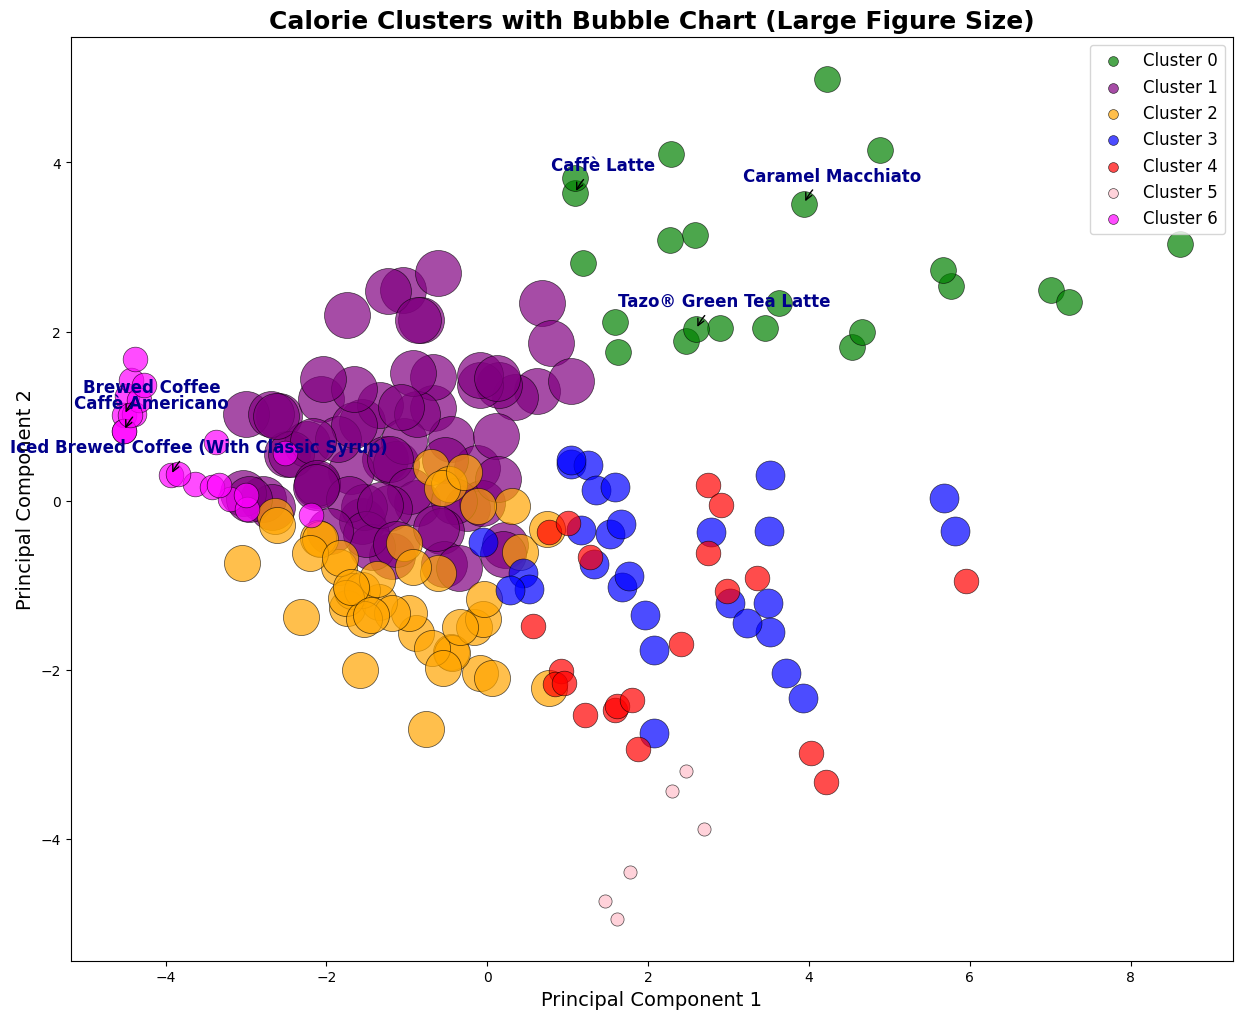

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 7

# Creating a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Creating a color map for different clusters
colors = {0: 'green', 1: 'purple', 2: 'orange', 3: 'blue', 4: 'red', 5: 'pink', 6: 'magenta'}

# Mapping cluster labels to custom legend labels dynamically
unique_clusters = np.unique(clusters)
legend_labels = {cluster_label: f'Cluster {cluster_label}' for cluster_label in unique_clusters}

# Counting the number of data points in each cluster
cluster_counts = np.bincount(clusters)

# Setting a larger figure size
fig, ax = plt.subplots(figsize=(15, 12))

# Visualizing the clusters using a bubble chart
for cluster_label in unique_clusters:
    if cluster_label in colors:
        indices = np.where(clusters == cluster_label)[0]
        valid_indices = [index for index in indices if index < len(df)]

        scatter = plt.scatter(reduced_data[valid_indices, 0], reduced_data[valid_indices, 1],
                              s=cluster_counts[cluster_label] * 15,
                              c=colors[cluster_label], label=legend_labels[cluster_label],
                              alpha=0.7, edgecolors='black', linewidth=0.5)

        # Annotating only a few data points for high and low-calorie clusters
        if cluster_label in [0, n_clusters - 1]:  # 0 is low-calorie, n_clusters-1 is high-calorie
            random_sample_indices = np.random.choice(valid_indices, size=min(3, len(valid_indices)), replace=False)
            for i, beverage_name in enumerate(df['Beverage'].iloc[random_sample_indices]):
                plt.annotate(beverage_name,
                             (reduced_data[random_sample_indices, 0][i], reduced_data[random_sample_indices, 1][i]),
                             xytext=(20, 20), textcoords='offset points',
                             fontsize=12, color='darkblue', ha='center', va='center', fontweight='bold',
                             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Customizing legend with handler map for custom-sized color indicators
legend_handler_map = {type(scatter): HandlerPathCollection()}
legend = plt.legend(handler_map=legend_handler_map, fontsize=12, markerscale=1.5)

# Setting the legend scatter size for color indicators
for lh in legend.legendHandles:
    lh._sizes = [50]

plt.title('Calorie Clusters with Bubble Chart (Large Figure Size)', fontsize=18, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.show()


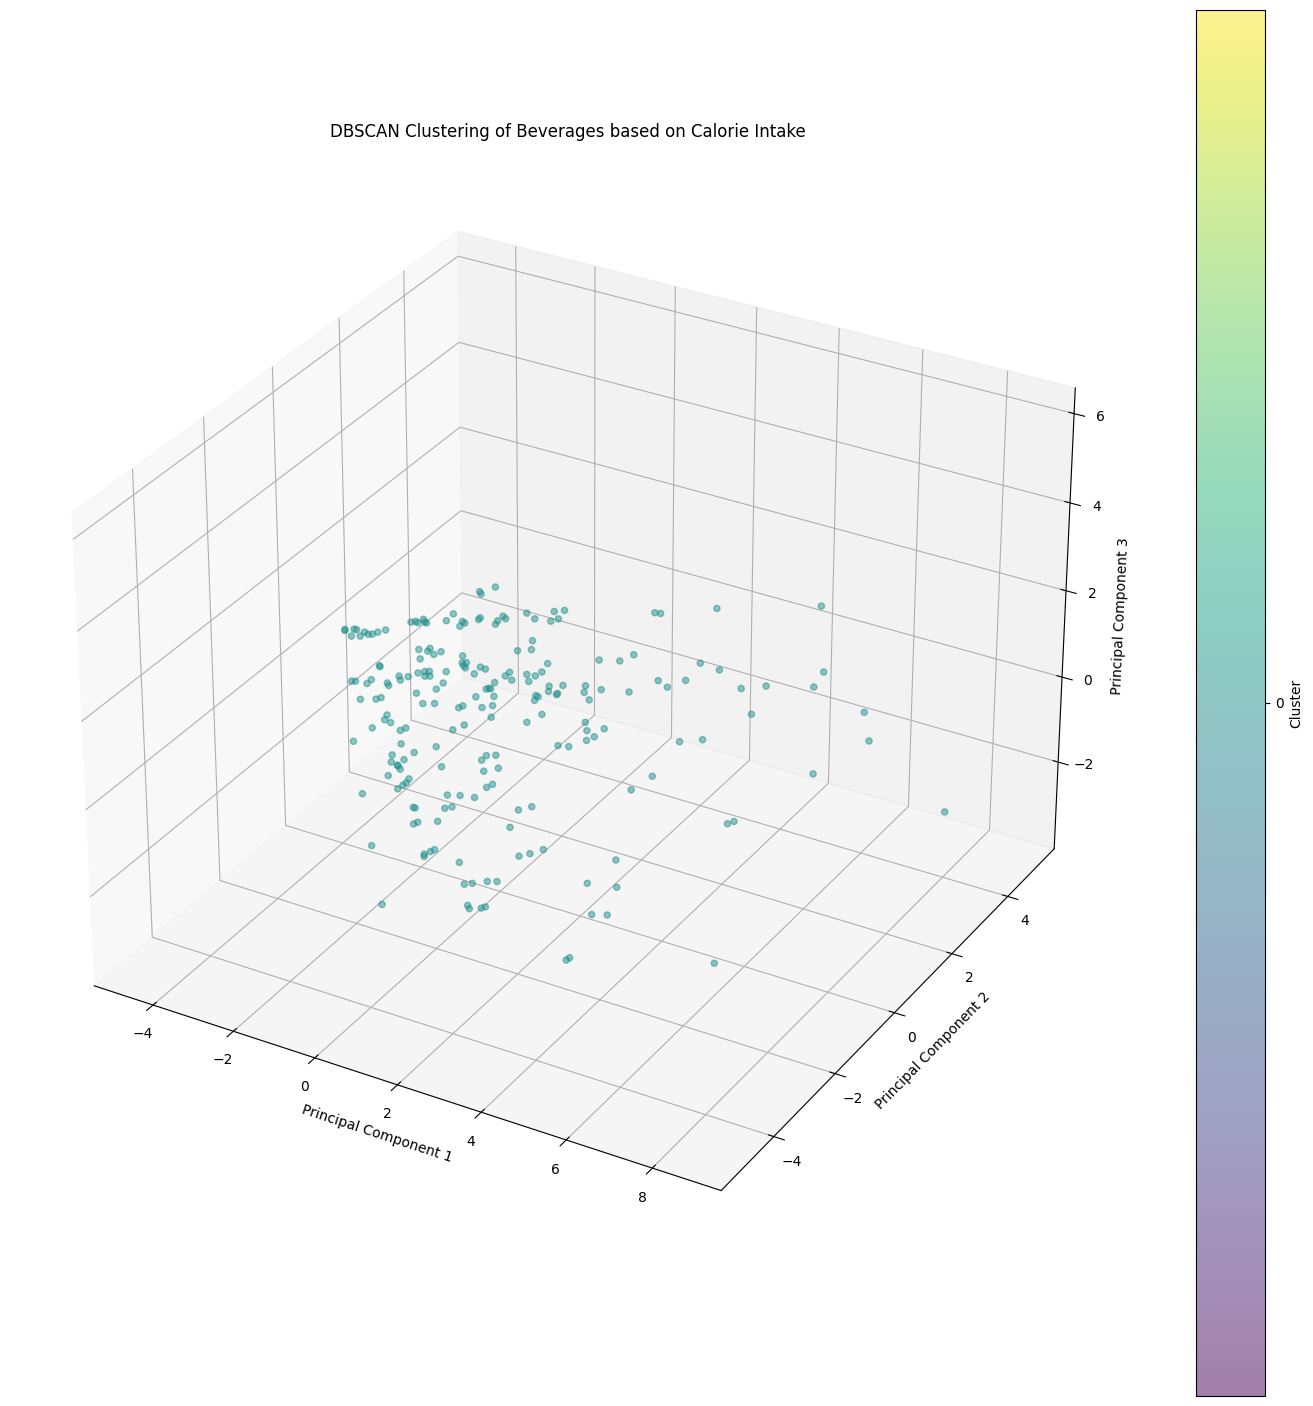

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D

# Assuming 'Calories' is the column representing calorie intake
calorie_data = df_encoded[['Calories']].values

# Standardizing the data
scaler = StandardScaler()
calorie_data_scaled = scaler.fit_transform(calorie_data)

# Creating a DBSCAN instance and fit the data
eps = 0.5  # Adjusting this value based on your data
min_samples = 5  # Adjusting this value based on your data

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(calorie_data_scaled)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1))

# Creating a 3D plot
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

# Scattering plot for clustering
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=clusters, cmap='viridis', alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clustering of Beverages based on Calorie Intake')

# Adding a colorbar to show cluster assignments
cbar = plt.colorbar(scatter, ticks=np.unique(clusters))
cbar.set_label('Cluster')

plt.show()


**CALORIE BASED CLSUTERING USING DBSCAN**

<ipython-input-30-6f0a77306d2b>:19: RuntimeWarning: invalid value encountered in divide
  colors = {label: plt.cm.nipy_spectral(float(i) / max(unique_clusters + 1)) for i, label in enumerate(unique_clusters)}


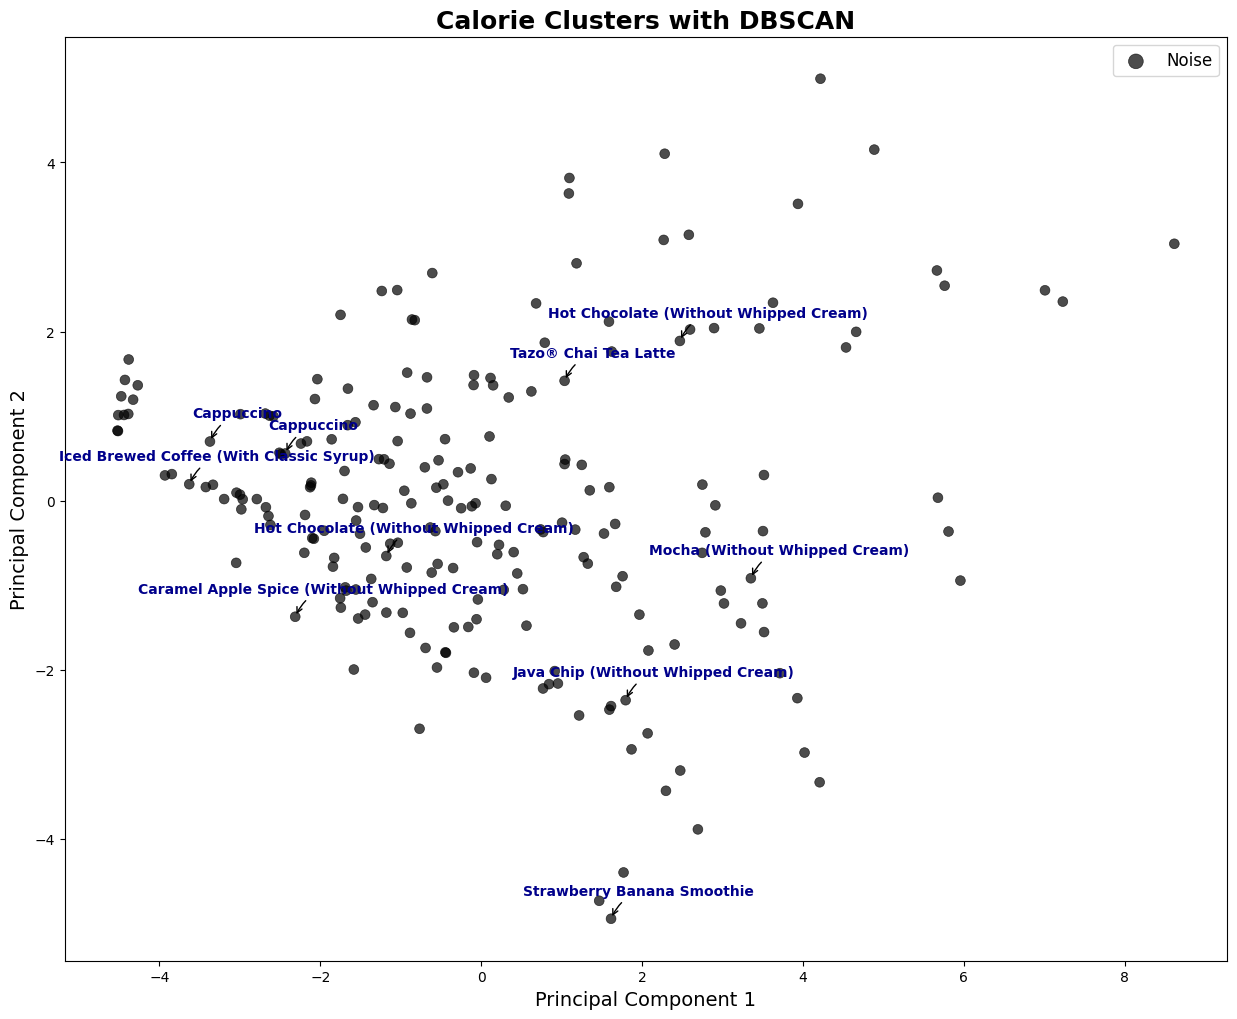

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Creating a DBSCAN instance and fit the data
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Creating a color map for different clusters
unique_clusters = np.unique(clusters)
colors = {label: plt.cm.nipy_spectral(float(i) / max(unique_clusters + 1)) for i, label in enumerate(unique_clusters)}

# Setting a larger figure size
fig, ax = plt.subplots(figsize=(15, 12))

# Visualizing the clusters using a scatter plot
for cluster_label in unique_clusters:
    indices = np.where(clusters == cluster_label)[0]
    valid_indices = [index for index in indices if index < len(df_numeric)]

    plt.scatter(reduced_data[valid_indices, 0], reduced_data[valid_indices, 1],
                s=50, c=[colors[cluster_label]] * len(valid_indices),
                label=f'Cluster {cluster_label}' if cluster_label != -1 else 'Noise', alpha=0.7, edgecolors='black', linewidth=0.5)

# Annotating a few data points for better interpretation
random_sample_indices = np.random.choice(len(df_numeric), size=min(10, len(df_numeric)), replace=False)
for i, beverage_name in enumerate(df['Beverage'].iloc[random_sample_indices]):
    plt.annotate(beverage_name,
                 (reduced_data[random_sample_indices, 0][i], reduced_data[random_sample_indices, 1][i]),
                 xytext=(20, 20), textcoords='offset points',
                 fontsize=10, color='darkblue', ha='center', va='center', fontweight='bold',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.title('Calorie Clusters with DBSCAN', fontsize=18, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(fontsize=12, markerscale=1.5)
plt.show()


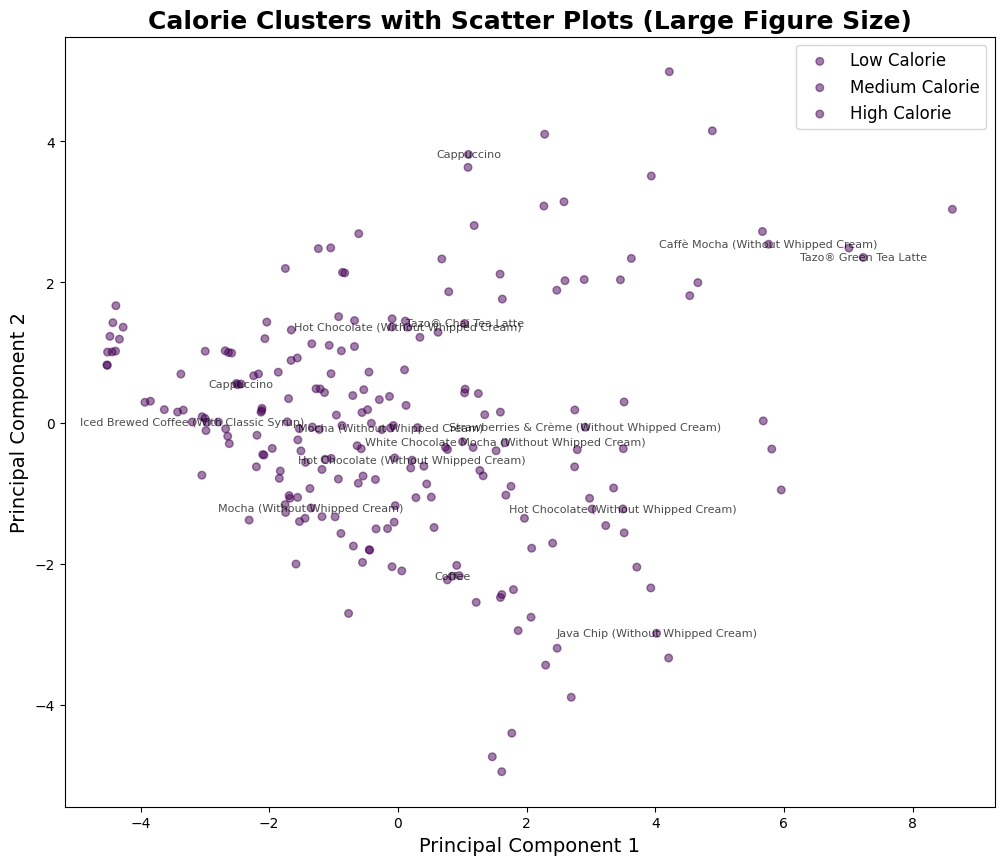

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 3

# Creating a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Mapping cluster labels to custom legend labels
legend_labels = {0: 'Low Calorie', 1: 'Medium Calorie', 2: 'High Calorie'}

# Setting a larger figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Visualizing the clusters using scatter plots for each cluster separately
for cluster_label in np.unique(clusters):
    indices = np.where(clusters == cluster_label)[0]  # Ensure boolean index has the correct length

    # Filtering indices to only include those present in the DataFrame
    valid_indices = [index for index in indices if index < len(df)]

    # Randomly selecting 5 values from each cluster for annotation
    random_sample_indices = np.random.choice(valid_indices, size=min(5, len(valid_indices)), replace=False)

    # Scattering plot with different colors and sizes for each cluster
    scatter = ax.scatter(reduced_data[valid_indices, 0], reduced_data[valid_indices, 1],
                         s=30,  # Adjusting the size of the points
                         c=[cluster_label] * len(valid_indices), cmap='viridis', alpha=0.5, label=legend_labels[cluster_label])

    # Annotating each data point with the beverage name using transparent labels
    for i, beverage_name in enumerate(df['Beverage'].iloc[random_sample_indices]):
        ax.text(reduced_data[random_sample_indices, 0][i], reduced_data[random_sample_indices, 1][i],
                beverage_name, fontsize=8, color='black', alpha=0.7, ha='center', va='center')

ax.set_title('Calorie Clusters with Scatter Plots (Large Figure Size)', fontsize=18, fontweight='bold')
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.legend(fontsize=12)
plt.show()


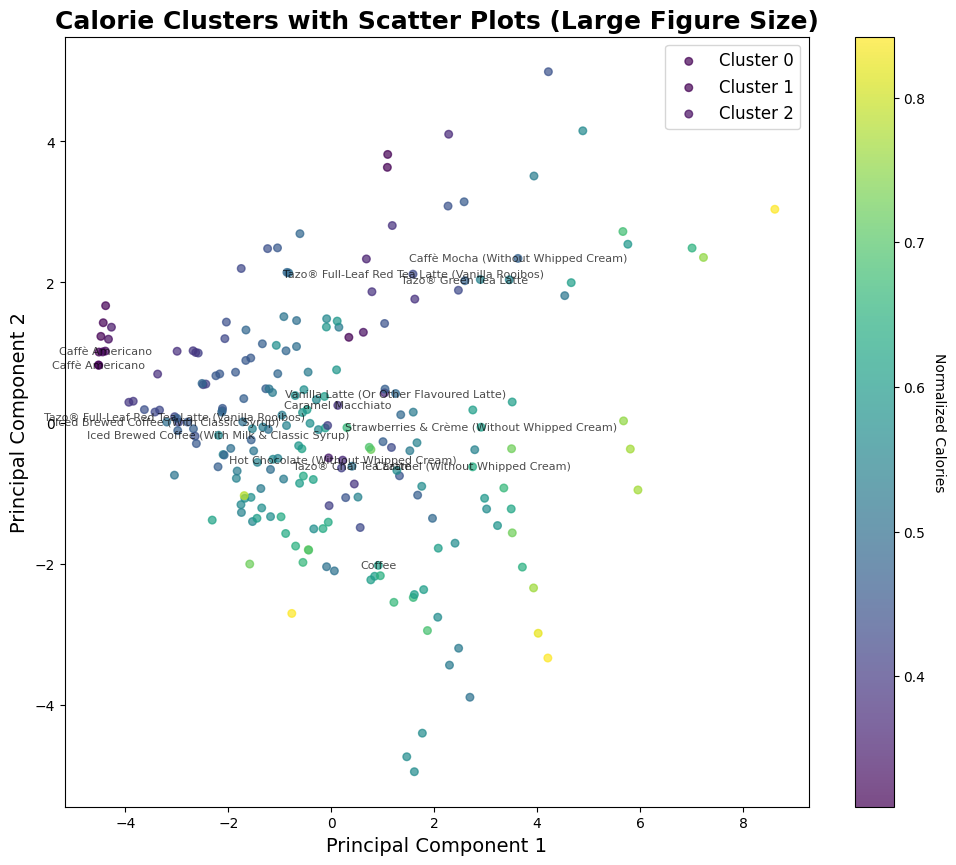

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 3

# Creating a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Normalizing the calorie values for better color representation
calories = df['Calories'].values.reshape(-1, 1)
scaler = MinMaxScaler()
normalized_calories = scaler.fit_transform(calories)

# Setting a larger figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Visualizing the clusters using scatter plots for each cluster separately
for cluster_label in np.unique(clusters):
    indices = np.where(clusters == cluster_label)[0]  # Ensuring boolean index has the correct length

    # Filtering indices to only include those present in the DataFrame
    valid_indices = [index for index in indices if index < len(df)]

    # Randomly selecting 5 values from each cluster for annotation
    random_sample_indices = np.random.choice(valid_indices, size=min(5, len(valid_indices)), replace=False)

    # Scattering plot with different colors and sizes for each cluster
    scatter = ax.scatter(reduced_data[valid_indices, 0], reduced_data[valid_indices, 1],
                         s=30,  # Adjusting the size of the points
                         c=normalized_calories[valid_indices], cmap='viridis', alpha=0.7, label=f'Cluster {cluster_label}')

    # Annotating each data point with the beverage name using transparent labels
    for i, beverage_name in enumerate(df['Beverage'].iloc[random_sample_indices]):
        ax.text(reduced_data[random_sample_indices, 0][i], reduced_data[random_sample_indices, 1][i],
                beverage_name, fontsize=8, color='black', alpha=0.7, ha='center', va='center')

# Setting  colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Normalized Calories', rotation=270, labelpad=15)

ax.set_title('Calorie Clusters with Scatter Plots (Large Figure Size)', fontsize=18, fontweight='bold')
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.legend(fontsize=12)
plt.show()


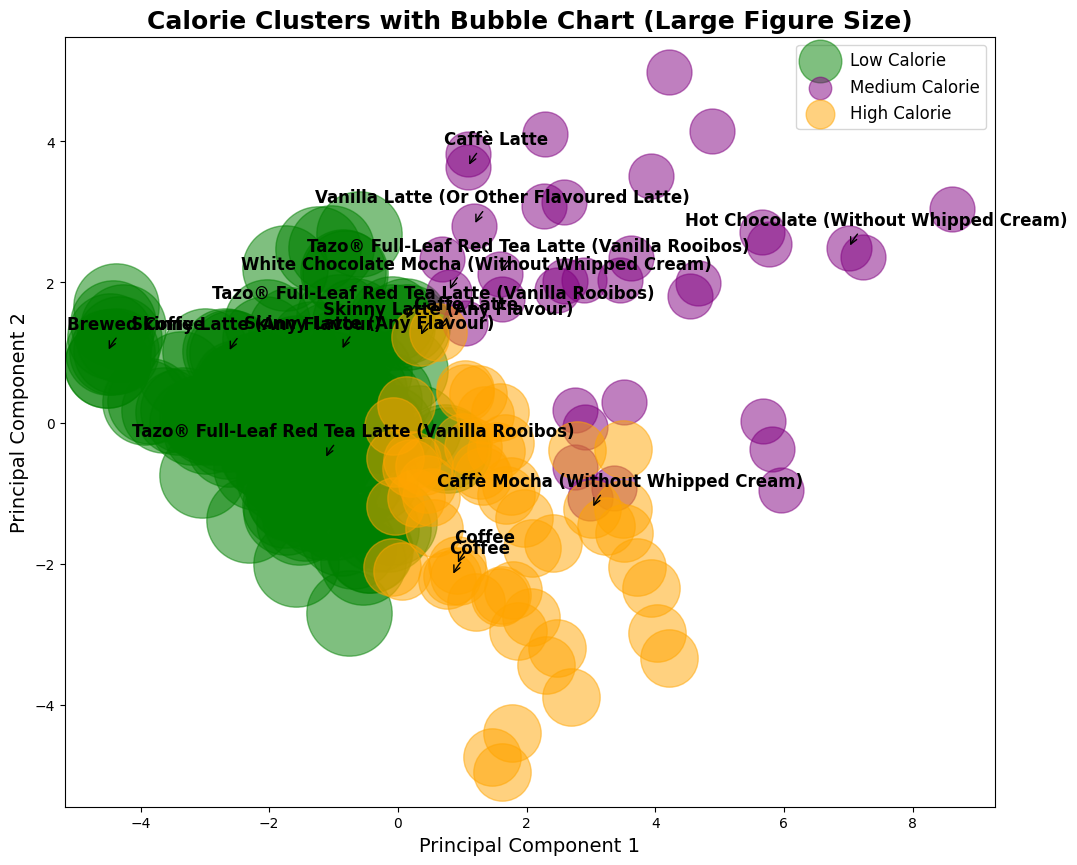

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 3

# Creating a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Creating a color map for different clusters
colors = {0: 'green', 1: 'purple', 2: 'orange'}

# Mapping cluster labels to custom legend labels
legend_labels = {0: 'Low Calorie', 1: 'Medium Calorie', 2: 'High Calorie'}

# Counting the number of data points in each cluster
cluster_counts = np.bincount(clusters)

# Setting a larger figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Visualizing the clusters using a bubble chart
for cluster_label in np.unique(clusters):
    if cluster_label in colors:
        indices = np.where(clusters == cluster_label)[0]  # Ensuring boolean index has the correct length

        # Filtering indices to only include those present in the DataFrame
        valid_indices = [index for index in indices if index < len(df)]

        # Randomly selecting 5 values from each cluster for annotation
        random_sample_indices = np.random.choice(valid_indices, size=min(5, len(valid_indices)), replace=False)

        # Scatter plot with different colors and sizes for each cluster
        plt.scatter(reduced_data[valid_indices, 0], reduced_data[valid_indices, 1],
                    s=cluster_counts[cluster_label] * 30,  # Adjust the multiplier for bubble size
                    c=colors[cluster_label], label=legend_labels[cluster_label], alpha=0.5)

        # Annotating each data point with the beverage name using arrows to avoid overlap
        for i, beverage_name in enumerate(df['Beverage'].iloc[random_sample_indices]):
            plt.annotate(beverage_name,
                         (reduced_data[random_sample_indices, 0][i], reduced_data[random_sample_indices, 1][i]),
                         xytext=(20, 20), textcoords='offset points',
                         fontsize=12, fontweight='bold', color='black', ha='center', va='center',
                         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.title('Calorie Clusters with Bubble Chart (Large Figure Size)', fontsize=18, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(fontsize=12, markerscale=0.5)  # Adjusting markerscale for legend bubble size
plt.show()


**K-MEANS CLUSTING: SWARM PLOT**

<ipython-input-246-2268a10f14b1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters
<ipython-input-246-2268a10f14b1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Cluster', y='Beverage', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.3% of the points cannot be placed; you may want to 

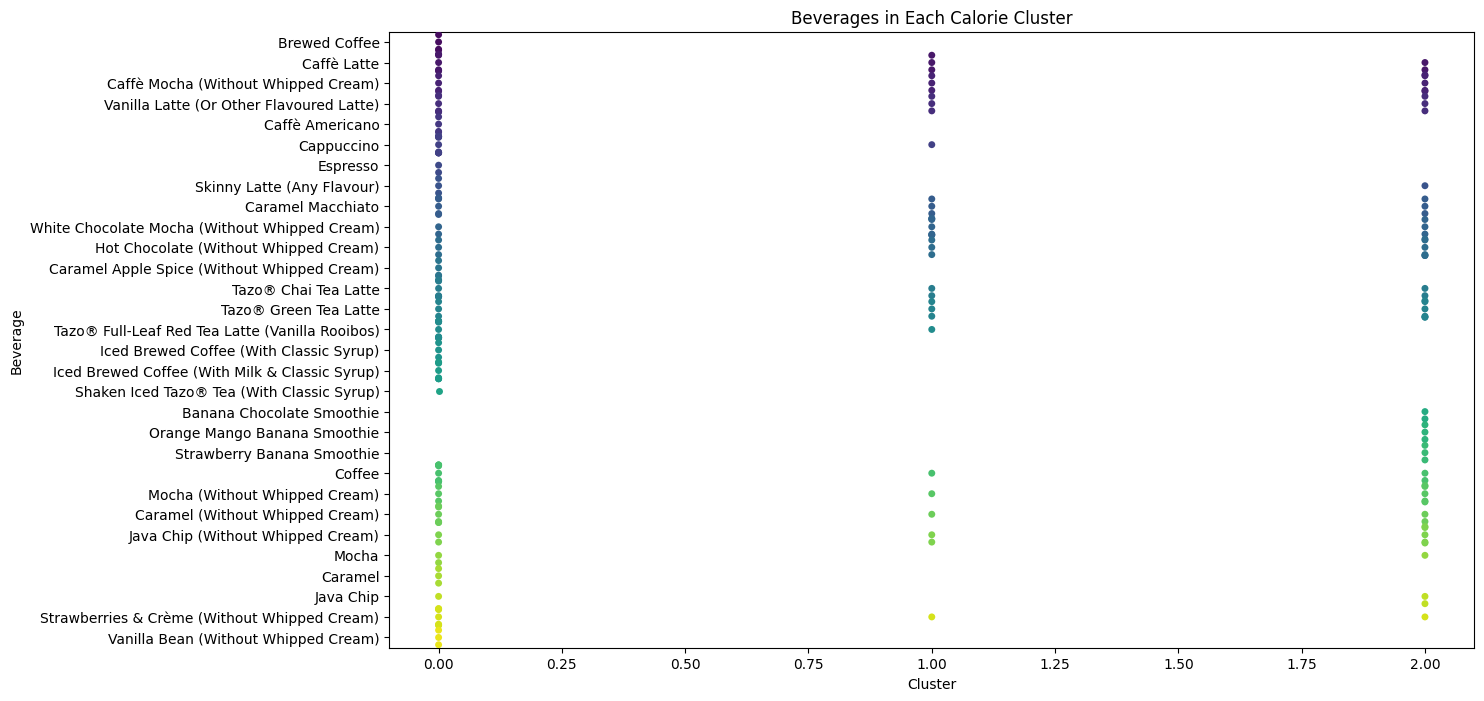

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Defining the number of clusters (low, medium, high-calorie)
n_clusters = 3

# Creating a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Excluding the problematic row from the DataFrame
df = df.iloc[:-1]

# Adding the cluster labels to the DataFrame
df['Cluster'] = clusters

# Setting a larger figure size
plt.figure(figsize=(14, 8))

# Creating a swarm plot to visualize which beverages fall under each cluster
sns.swarmplot(x='Cluster', y='Beverage', data=df, palette='viridis')

plt.title('Beverages in Each Calorie Cluster')
plt.xlabel('Cluster')
plt.ylabel('Beverage')
plt.show()


In [ ]:
print(f"Length of clusters: {len(clusters)}")

Length of clusters: 218


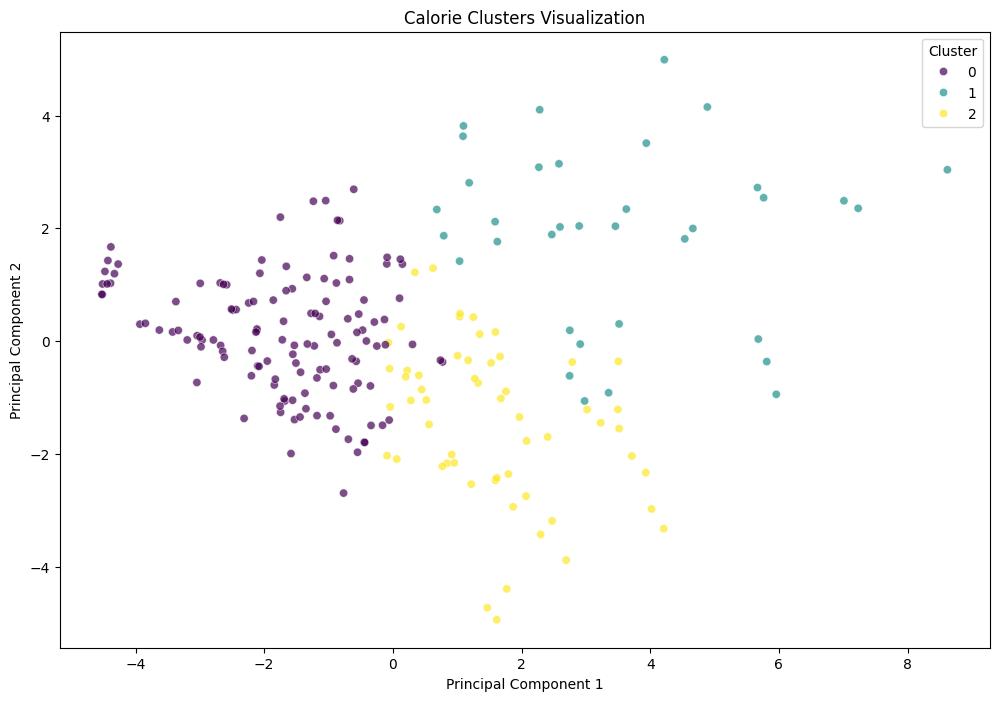

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load only the numeric and one-hot encoded variables
df_numeric = df_encoded.drop(['Beverage', 'Beverage_category', 'Beverage_prep'], axis=1)

# Define the number of clusters (low, medium, high-calorie)
n_clusters = 3

# Create a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_numeric)

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# Create a new DataFrame for visualization
df_vis = pd.DataFrame(reduced_data, columns=['Principal Component 1', 'Principal Component 2'])
df_vis['Cluster'] = clusters

# Create a scatter plot to visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=df_vis, palette='viridis', alpha=0.7)
plt.title('Calorie Clusters Visualization')
plt.show()
